In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
frequentation = pd.read_csv("frequentation.csv")

In [3]:
# merger les deux tableaux sur la colonne 'date'
menus = pd.read_csv("menus.csv")
df_freqmenus = pd.merge(frequentation,menus, on = 'date', how= 'outer', indicator = True)
df_freqmenus

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


In [4]:
df_freqmenus.isnull().sum()

Unnamed: 0_x       0
date               0
annee_scolaire     0
jour               0
semaine            0
mois               0
greves             0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
Unnamed: 0_y       0
menu               0
porc               0
viande             0
poisson            0
bio                0
noel               0
frites             0
an_chinois         0
_merge             0
dtype: int64

In [5]:
df_freqmenus.drop_duplicates()
#=> pas de doublons

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


In [6]:
nuls_an = df_freqmenus[df_freqmenus['annee_scolaire'].isna()].index
nuls_an

Index([], dtype='int64')

In [7]:
nuls_mois = df_freqmenus[df_freqmenus['mois'].isna()].index
nuls_mois

Index([], dtype='int64')

In [8]:
nuls_j = df_freqmenus[df_freqmenus['jour'].isna()].index
nuls_j

Index([], dtype='int64')

In [9]:
df_freqmenus['jour'].nunique(), df_freqmenus['semaine'].nunique(), df_freqmenus['mois'].nunique()

(5, 44, 11)

In [10]:
df_freqmenus['mois'].unique() #=> il manque le mois d'août

array(['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
       'Septembre', 'Octobre', 'Novembre', 'Decembre'], dtype=object)

In [11]:
df_freqmenus['semaine'].unique()
# semaines 28 à 34: grandes vacances; semaine 52: vacances de Noël

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 16, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47,
       48, 49, 50,  9, 10, 17, 27, 43, 51, 35], dtype=int64)

In [12]:
df_freqmenus['jour'].unique() #=> pourquoi mercredi en dernier dans la liste?

array(['Lundi', 'Mardi', 'Jeudi', 'Vendredi', 'Mercredi'], dtype=object)

In [13]:
# identifier les index des lignes où la valeur est 0 dans la colonne prevision
nuls_prev = df_freqmenus[df_freqmenus['prevision'] == 0].index
nuls_prev

Index([ 56,  57,  58,  59,  73,  79, 104, 112, 141, 142, 160, 299, 306, 375,
       392, 393, 394, 395, 396, 397, 403, 404, 405, 406, 407, 411, 416, 417,
       443, 453, 458, 483],
      dtype='int64')

In [14]:
# identifier les index des lignes où la valeur est 0 dans la colonne reel
nuls_reel = df_freqmenus[df_freqmenus['reel'] == 0].index
nuls_reel

Index([ 56,  57,  58,  59,  73,  79, 104, 112, 141, 142, 160, 299, 306, 375,
       392, 393, 394, 395, 396, 397, 403, 404, 405, 406, 407, 411, 416, 417,
       443, 453, 458, 483],
      dtype='int64')

In [15]:
# exactement les mêmes lignes: les supprimer
df_freqmenus.drop(nuls_reel, inplace=True)
#=> bien 32 lignes supprimées

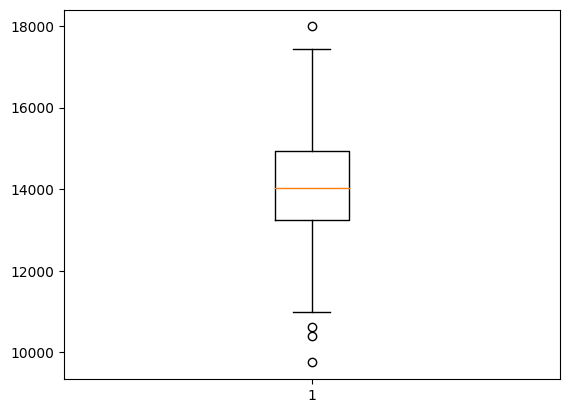

In [16]:
# boxplot pour regarder la distribution de "prevision"
import matplotlib.pyplot as plt
col_prev = df_freqmenus['prevision']
# Créer le boxplot
plt.boxplot(col_prev)
# Afficher le graphique
plt.show()

In [17]:
outl_prevision = df_freqmenus.loc[(df_freqmenus['prevision'] < 10900) | (df_freqmenus['prevision'] > 17950)].index
outl_prevision

Index([22, 30, 91, 953], dtype='int64')

In [18]:
# suppression des 4 ouliers de prevision
df_freqmenus.drop(outl_prevision, inplace=True)
df_freqmenus
#=> 4 lignes ont bien été supprimées

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


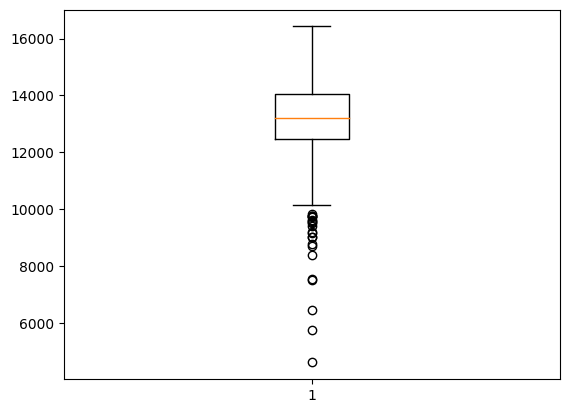

In [19]:
# boxplot pour chercher les outliers dans reel
col_reel = df_freqmenus['reel']
# Créer le boxplot
plt.boxplot(col_reel)
# Afficher le graphique
plt.show()

In [20]:
# outliers de la colonne reel
outl_reel = df_freqmenus.loc[(df_freqmenus['reel'] < 7000)]
outl_reel
#=> pour le mardi 12/09/2017, index 882: 4614 
#-> alors que pas d'événement spécial mentionné: erreur de frappe, manque le 1 devant?=> à enlever
#   => pour le jeudi 21/09/2017, index 887: jour de grève: sera enlevé avec les autres
#   => pour le mardi 10/12/2019: index 1184: 6442
#-> pas d'événement spécial, veille à env. 10000 reel, jour suivant non renseigné... enlever, mais doute"""

"=> pour le mardi 12/09/2017, index 882: 4614 \n-> alors que pas d'événement spécial mentionné: erreur de frappe, manque le 1 devant?=> à enlever\n   => pour le jeudi 21/09/2017, index 887: jour de grève: sera enlevé avec les autres\n   => pour le mardi 10/12/2019: index 1184: 6442\n-> pas d'événement spécial, veille à env. 10000 reel, jour suivant non renseigné... enlever, mais doute"

In [21]:
len(df_freqmenus)

1152

In [22]:
# supprimer les outliers de la colonne reel selon l'index
indexes_to_drop = [882, 1184]

# Utilisez la méthode drop avec l'argument index et inplace=True pour supprimer les lignes directement dans le DataFrame
df_freqmenus.drop(indexes_to_drop, inplace=True)

In [23]:
len(df_freqmenus)

1150

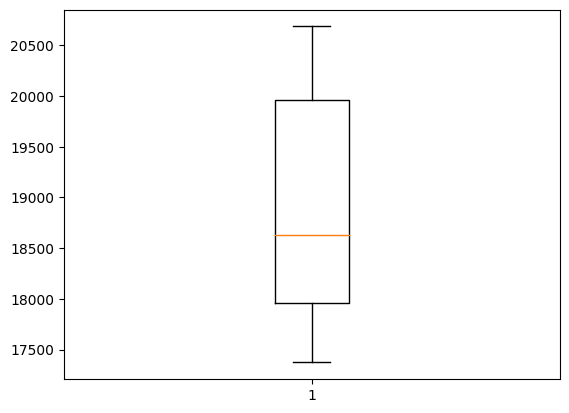

In [24]:
# boxplot pour observer la distribution de 'effectif'
col_effectif = df_freqmenus['effectif']
# Créer le boxplot
plt.boxplot(col_effectif)
# Afficher le graphique
plt.show()

In [25]:
# enlever colonne ferie: 1 occurrence
df_freqmenus = df_freqmenus.drop('ferie', axis=1)
df_freqmenus.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson',
       'bio', 'noel', 'frites', 'an_chinois', '_merge'],
      dtype='object')

In [26]:
# enlever les mercredi, car jours de garderie
mercredis = df_freqmenus.loc[(df_freqmenus['jour'] == "Mercredi")].index
df_freqmenus.drop(mercredis, inplace=True)
df_freqmenus
#=> 7 lignes ont bien été supprimées

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,1182,2019-12-03,2019-2020,Mardi,49,Decembre,1,0,0,0,...,1182,"['Salade de perles', 'Sauté de dinde sauce for...",0,1,0,0,0,0,0,both
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


In [27]:
# identifier les jours de grèves
j_greves = df_freqmenus.loc[(df_freqmenus['greves'] == 1)].index
j_greves

Index([  40,   64,  123,  161,  184,  224,  322,  323,  324,  408,  409,  414,
        492,  506,  537,  547,  560,  567,  588,  613,  623,  650,  749,  768,
        777,  789,  803,  831,  873,  875,  887,  891,  908,  909,  928,  929,
        949,  950,  951,  969,  983,  989,  996, 1002, 1006, 1012, 1054, 1061,
       1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1075, 1085, 1087,
       1088, 1090, 1091, 1092, 1093, 1094, 1095, 1097, 1098, 1105, 1115, 1125,
       1133, 1134, 1136, 1141, 1145, 1155, 1170, 1182, 1185, 1186, 1187],
      dtype='int64')

In [28]:
# supprimer les j_greves
df_freqmenus.drop(j_greves, inplace=True)

In [29]:
len(df_freqmenus)

1059

In [30]:
# identifier les jours de vacances
j_vac = df_freqmenus.loc[(df_freqmenus['vacances'] == 1)]
j_vac

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
60,60,2011-05-09,2010-2011,Lundi,19,Mai,0,0,1,1,...,60,"['Melon', 'lasagne de b\x9cuf', 'salade', 'Crè...",0,1,0,0,0,0,0,both
191,191,2012-04-23,2011-2012,Lundi,17,Avril,0,0,0,1,...,191,"['Radis/beurre', 'Hachis parmentier', 'salade ...",0,1,0,0,0,0,0,both
594,594,2015-04-27,2014-2015,Lundi,18,Avril,0,0,0,1,...,594,"['Salade de pâtes aux tomates confites', 'Hach...",0,1,0,0,0,0,0,both
694,694,2016-02-22,2015-2016,Lundi,8,Fevrier,0,0,0,1,...,694,"['Potage aux légumes', 'Lasagnes', 'Salade de ...",0,1,0,0,0,0,0,both
695,695,2016-02-23,2015-2016,Mardi,8,Fevrier,0,0,0,1,...,695,"['Choux blancs bio à la mimolette', 'jambon fu...",1,1,0,1,0,0,0,both
696,696,2016-02-25,2015-2016,Jeudi,8,Fevrier,0,0,0,1,...,696,"['Nouvel an chinois', 'Nem', 'Canard sauce aig...",0,1,0,0,0,0,1,both
697,697,2016-02-26,2015-2016,Vendredi,8,Fevrier,0,0,0,1,...,697,"['Taboulé', 'Nuggets de poisson', 'Epinards', ...",0,0,1,1,0,0,0,both
715,715,2016-04-18,2015-2016,Lundi,16,Avril,0,0,0,1,...,715,"['PA jeudi avec volaille', 'Radis / beurre', '...",0,1,0,1,0,0,0,both
716,716,2016-04-19,2015-2016,Mardi,16,Avril,0,0,0,1,...,716,"['Gaspacho', 'Rôti de b\x9cuf au jus', 'Gratin...",0,1,0,0,0,0,0,both
717,717,2016-04-21,2015-2016,Jeudi,16,Avril,0,0,0,1,...,717,"['PA lundi avec porc', 'Carottes râpées bio', ...",1,1,0,1,0,0,0,both


In [31]:
# après vérification d'après les calendriers des vacances scolaires:
# index des jours qui tombent pendant les vacances: à supprimer
indexes_to_drop_2 = [694, 695, 696, 697, 715, 716, 717, 718, 719, 720, 721, 818, 819, 820, 821, 840, 841, 842,
                    843, 844, 845, 846, 977, 978]
len(indexes_to_drop_2)

24

In [32]:
# supprimer ces jours
df_freqmenus.drop(indexes_to_drop_2, inplace=True)

In [33]:
len(df_freqmenus)

1035

In [34]:
df_freqmenus.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson',
       'bio', 'noel', 'frites', 'an_chinois', '_merge'],
      dtype='object')

In [35]:
# index des lignes où le menu n'est pas renseigné
crochets_menus = df_freqmenus.loc[(df_freqmenus['menu'] == "[]")].index
len(crochets_menus)

79

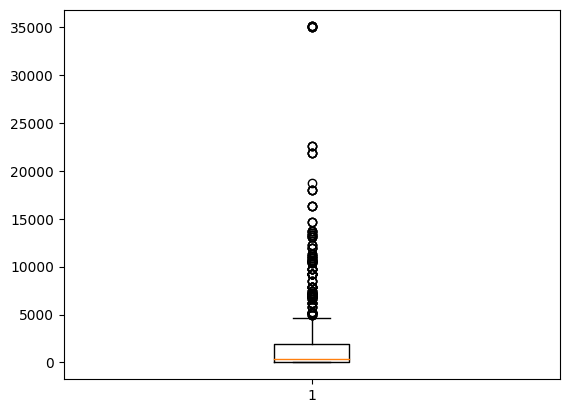

In [36]:
# boxplot pour observer la distribution de 'inc_grippe'
col_grippe = df_freqmenus['inc_grippe']
# Créer le boxplot
plt.boxplot(col_grippe)
# Afficher le graphique
plt.show()

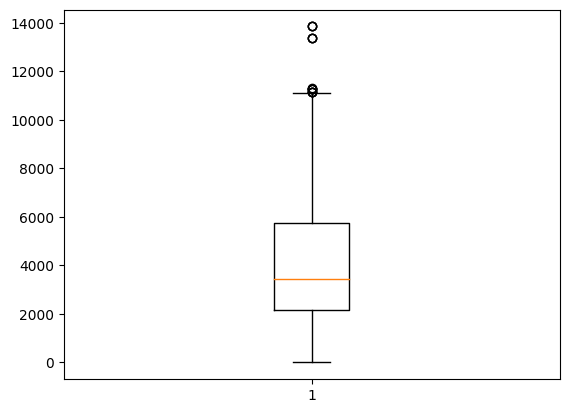

In [37]:
# boxplot pour observer la distribution de 'inc_gastro'
col_gastro = df_freqmenus['inc_gastro']
# Créer le boxplot
plt.boxplot(col_gastro)
# Afficher le graphique
plt.show()

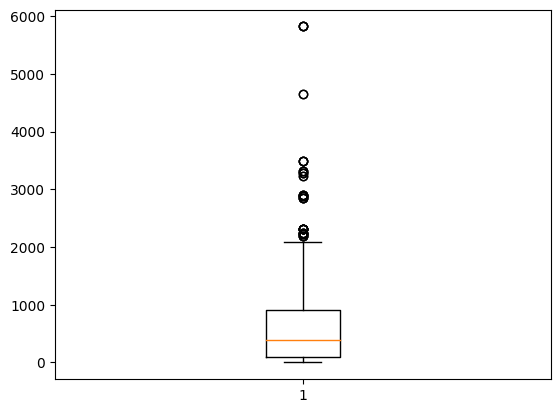

In [38]:
# boxplot pour regarder la distribution de 'inc_varicelle'
col_varicelle = df_freqmenus['inc_varicelle']
# Créer le boxplot
plt.boxplot(col_varicelle)
# Afficher le graphique
plt.show()

In [39]:
# chercher les 0 dans reel, effectif et prevision
#=> c'est bon
# reset index
df_freqmenus.reset_index()

,index,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1178,1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,...,1178,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,both
1031,1179,1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,...,1179,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,both
1032,1180,1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,...,1180,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,both
1033,1181,1181,2019-12-02,2019-2020,Lundi,49,Decembre,0,0,0,...,1181,"['Salade coleslaw', 'Raviolis de légumes ', 'S...",0,0,0,0,0,0,0,both


In [40]:
# Pivot table effectifs par mois, par année scolaire
eff_ann = df_freqmenus.pivot_table(index = ["mois"], columns=['annee_scolaire'] ,values =['effectif'])
eff_ann
"""=> les effectifs ne sont pas constants sur les années scolaires 2011-2012, 2012-2013, 2014-2015
   => il manque les effectifs: sept/oct/nov/déc 2010; mars/juillet 2015; à partir de janvier 2020"""

'=> les effectifs ne sont pas constants sur les années scolaires 2011-2012, 2012-2013, 2014-2015\n   => il manque les effectifs: sept/oct/nov/déc 2010; mars/juillet 2015; à partir de janvier 2020'

In [41]:
# "lisser" les effectifs pour les années où ils ne sont pas constants: moyenne entre les 2 nombres
# Année 2011-2012
# dans la colonne effectif, identifier les index des lignes où il y a la valeur à remplacer
val_2011_12 = df_freqmenus.loc[df_freqmenus['effectif'].isin([17955, 17660])].index
val_2011_12

Index([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       ...
       219, 220, 221, 222, 223, 225, 226, 227, 228, 229],
      dtype='int64', length=128)

In [42]:
# remplacer par la moyenne des 2 nombres
df_freqmenus.loc[val_2011_12, 'effectif'] = int((17955+17660)/2)
df_freqmenus.effectif.unique()

array([17373, 17807, 18123, 17842, 18243, 18633, 18497, 19066, 19639,
       19958, 20344, 20685], dtype=int64)

In [43]:
# Année 2012-2013
val_2012_13 = df_freqmenus.loc[df_freqmenus['effectif'].isin([17842, 18123])].index
val_2012_13

Index([230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       ...
       361, 362, 363, 364, 365, 366, 367, 368, 369, 370],
      dtype='int64', length=134)

In [44]:
df_freqmenus.loc[val_2012_13, 'effectif'] = int((17842+18123)/2)
df_freqmenus.effectif.unique()

array([17373, 17807, 17982, 18243, 18633, 18497, 19066, 19639, 19958,
       20344, 20685], dtype=int64)

In [45]:
# Année 2014-2015
val_2014_15 = df_freqmenus.loc[df_freqmenus['effectif'].isin([18497, 18633])].index
val_2014_15

Index([512, 513, 514, 515, 516, 517, 518, 519, 520, 521,
       ...
       610, 611, 612, 614, 615, 616, 617, 618, 619, 620],
      dtype='int64', length=102)

In [46]:
df_freqmenus.loc[val_2014_15, 'effectif'] = int((18497+18633)/2)
df_freqmenus.effectif.unique()

array([17373, 17807, 17982, 18243, 18565, 19066, 19639, 19958, 20344,
       20685], dtype=int64)

In [47]:
# Pivot table 'reel' par mois, par année scolaire
reel_ann = df_freqmenus.pivot_table(index = ["mois"], columns=['annee_scolaire'] ,values =['reel'])
reel_ann

reel                                            \
annee_scolaire     2010-2011     2011-2012     2012-2013     2013-2014   
mois                                                                     
Avril           12186.615385  12404.555556  12585.818182  13090.214286   
Decembre                 NaN  12515.875000  12608.416667  13145.111111   
Fevrier         11894.000000  12352.285714  12598.916667  12932.357143   
Janvier         11800.411765  12542.312500  12626.714286  13135.666667   
Juillet         11240.000000  10297.666667  10619.250000  10864.333333   
Juin            11274.285714  12160.125000  12188.500000  12477.642857   
Mai             12105.000000  12415.923077  12808.307692  13083.111111   
Mars            12256.800000  12449.588235  12856.666667  13174.625000   
Novembre                 NaN  12356.428571  12842.833333  12948.000000   
Octobre                  NaN  12301.090909  12625.125000  12933.800000   
Septembre                NaN  12155.714286  12245.733333  12652.866667   

                                                                        \
annee_scolaire     2014-2015     2015-2016     2016-2017     2017-2018   
mois                                                                     
Avril           13526.428571  14368.000000  14146.000000  14443.444444   
Decembre        13418.818182  14073.454545  14420.625000  14369.272727   
Fevrier         12987.571429  13339.200000  13950.500000  14308.375000   
Janvier         13228.133333  13855.666667  13793.933333  14411.071429   
Juillet                  NaN  10934.500000  11879.500000  12150.666667   
Juin            12556.400000  12912.545455  13522.500000  13920.846154   
Mai             13449.416667  13812.454545  13920.000000  14375.750000   
Mars                     NaN  13438.266667  14169.142857  14393.636364   
Novembre        13243.428571  13663.750000  14106.307692  14399.583333   
Octobre         13378.000000  13856.777778  14045.666667  14502.400000   
Septembre       13039.647059  13400.375000  13796.125000  13979.307692   

                                            
annee_scolaire     2018-2019     2019-2020  
mois                                        
Avril           14201.000000           NaN  
Decembre        14854.700000  13081.500000  
Fevrier         14608.800000           NaN  
Janvier         14088.750000           NaN  
Juillet         13092.666667           NaN  
Juin            13668.916667           NaN  
Mai             14699.692308           NaN  
Mars            14133.285714           NaN  
Novembre        14735.200000  15378.500000  
Octobre         14715.500000  15174.400000  
Septembre       14372.066667  14662.357143

In [48]:
# créer la colonne % fréquentation: (nbre de repas consommés par jour / effectif global)*100
df_freqmenus['Prcent_freq'] = (df_freqmenus["reel"] / df_freqmenus["effectif"]) * 100
df_freqmenus.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson',
       'bio', 'noel', 'frites', 'an_chinois', '_merge', 'Prcent_freq'],
      dtype='object')

In [49]:
df_freqmenus.Prcent_freq.min(), df_freqmenus.Prcent_freq.max(), df_freqmenus.Prcent_freq.mean()

(41.19642154935116, 80.05499261673201, 70.40737627149542)

In [50]:
# identifier les lignes où Prcent_freq est < 60 %
freq_60 = df_freqmenus.loc[(df_freqmenus['Prcent_freq'] < 60.0)].index
freq_60

Index([  87,   88,   89,  227,  228,  230,  330,  367,  368,  371,  508,  509,
        510,  512,  620,  621,  733,  745,  746,  874,  877, 1004, 1005, 1008,
       1121, 1139, 1183],
      dtype='int64')

In [51]:
# supprimer les freq_60
df_freqmenus.drop(freq_60, inplace=True)
df_freqmenus

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,...,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge,Prcent_freq
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both,64.059172
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both,67.967536
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both,67.581880
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both,70.926150
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,...,"['Mâche aux graines de tournesol bio', 'Parmen...",0,0,0,1,0,0,0,both,73.207638
1178,1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,...,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,both,77.128354
1179,1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,...,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,both,71.858835
1180,1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,...,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,both,79.395697


In [52]:
df_freqmenus.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson',
       'bio', 'noel', 'frites', 'an_chinois', '_merge', 'Prcent_freq'],
      dtype='object')

In [53]:
len(df_freqmenus)

1008

# ANALYSE DES VARIABLES PAR RAPPORT A LA FREQUENTATION

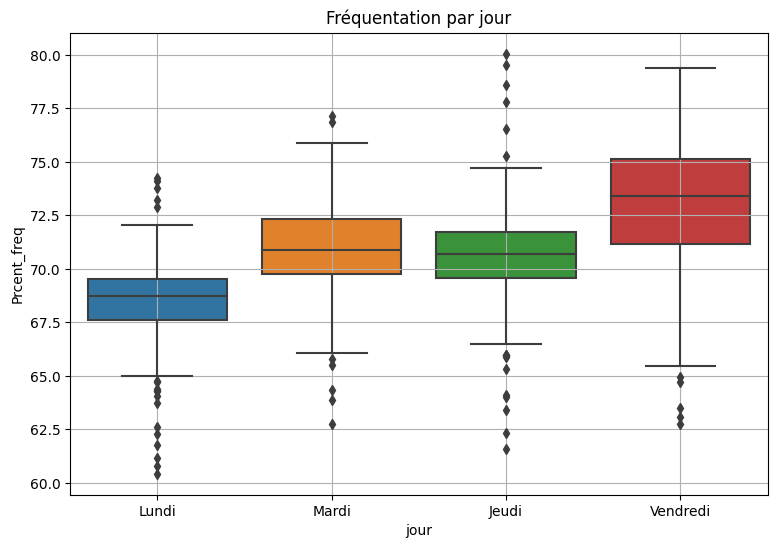

In [54]:
# Boxplots fréquentation par rapport au jour
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='jour',y="Prcent_freq",data=df_freqmenus, showfliers=True)
plt.title('Fréquentation par jour')
plt.grid()
plt.show()

In [55]:
#Anova "jours"
anova_jour = smf.ols('Prcent_freq~jour', data=df_freqmenus).fit()
print(anova_jour.summary())
sm.stats.anova_lm(anova_jour, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     159.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.70e-84
Time:                        15:18:15   Log-Likelihood:                -2312.0
No. Observations:                1008   AIC:                             4632.
Df Residuals:                    1004   BIC:                             4652.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           70.6035      0.155  

,sum_sq,df,F,PR(>F)
jour,2761.282437,3.0,159.405082,1.703155e-84
Residual,5797.237952,1004.0,NaN,NaN


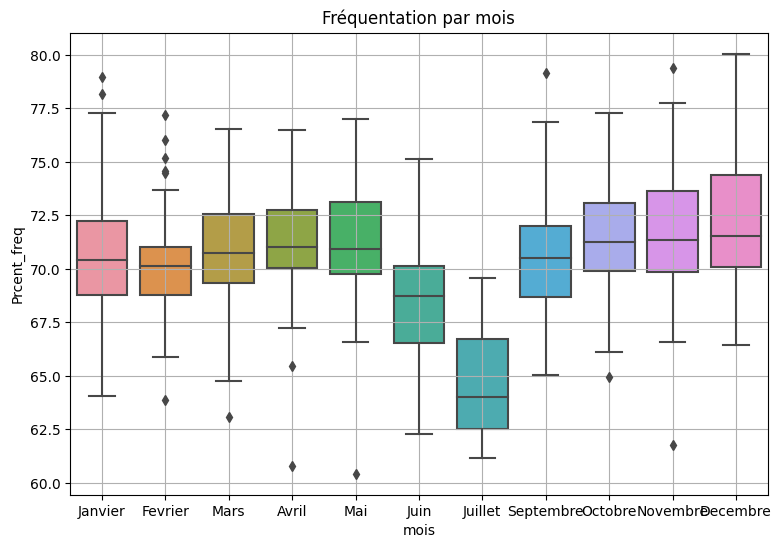

In [56]:
# Boxplots fréquentation par rapport au mois
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="Prcent_freq",data=df_freqmenus, showfliers=True)
plt.title('Fréquentation par mois')
plt.grid()
plt.show()

In [57]:
#Anova "mois"
anova_mois = smf.ols('Prcent_freq~mois', data=df_freqmenus).fit()
print(anova_mois.summary())
sm.stats.anova_lm(anova_mois, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.97e-30
Time:                        15:18:15   Log-Likelihood:                -2424.8
No. Observations:                1008   AIC:                             4872.
Df Residuals:                     997   BIC:                             4926.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            71.1925      0.31

,sum_sq,df,F,PR(>F)
mois,1307.125346,10.0,17.971769,1.966609e-30
Residual,7251.395044,997.0,NaN,NaN


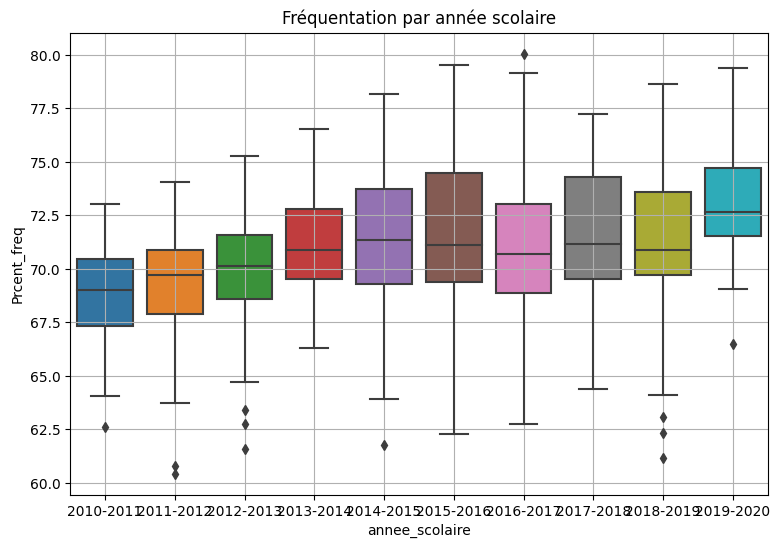

In [58]:
# Boxplots fréquentation par rapport à l'année scolaire
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='annee_scolaire',y="Prcent_freq",data=df_freqmenus, showfliers=True)
plt.title('Fréquentation par année scolaire')
plt.grid()
plt.show()

In [59]:
#Anova "annee_scolaire"
anova_an = smf.ols('Prcent_freq~annee_scolaire', data=df_freqmenus).fit()
print(anova_an.summary())
sm.stats.anova_lm(anova_an, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     16.66
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           9.40e-26
Time:                        15:18:15   Log-Likelihood:                -2437.8
No. Observations:                1008   AIC:                             4896.
Df Residuals:                     998   BIC:                             4945.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,sum_sq,df,F,PR(>F)
annee_scolaire,1118.045411,9.0,16.662755,9.396538e-26
Residual,7440.474979,998.0,NaN,NaN


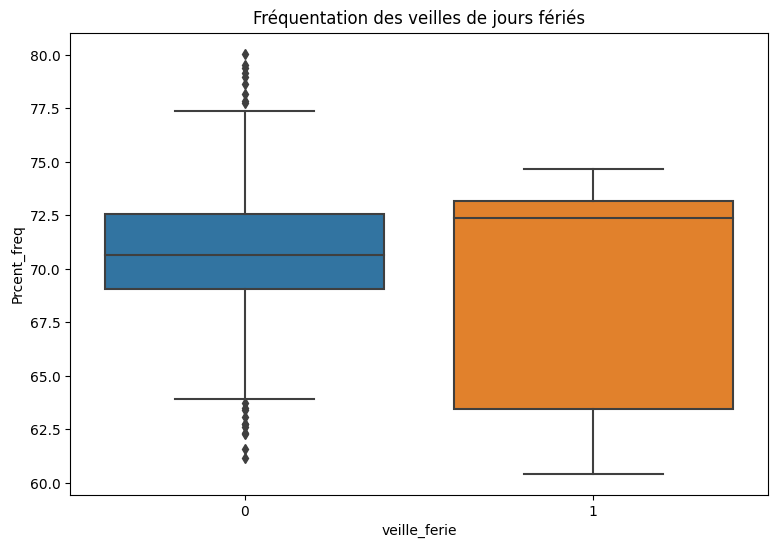

In [60]:
# Fréquence par rapport à 'veille_ferie'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="veille_ferie", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation des veilles de jours fériés')
plt.show()

In [61]:
#Anova "veille_ferie"
anova_v_ferie = smf.ols('Prcent_freq~veille_ferie', data=df_freqmenus).fit()
print(anova_v_ferie.summary())
sm.stats.anova_lm(anova_v_ferie, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.469
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0628
Time:                        15:18:15   Log-Likelihood:                -2506.6
No. Observations:                1008   AIC:                             5017.
Df Residuals:                    1006   BIC:                             5027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       70.8311      0.092    768.487   

,sum_sq,df,F,PR(>F)
veille_ferie,29.414473,1.0,3.469409,0.062805
Residual,8529.105917,1006.0,NaN,NaN


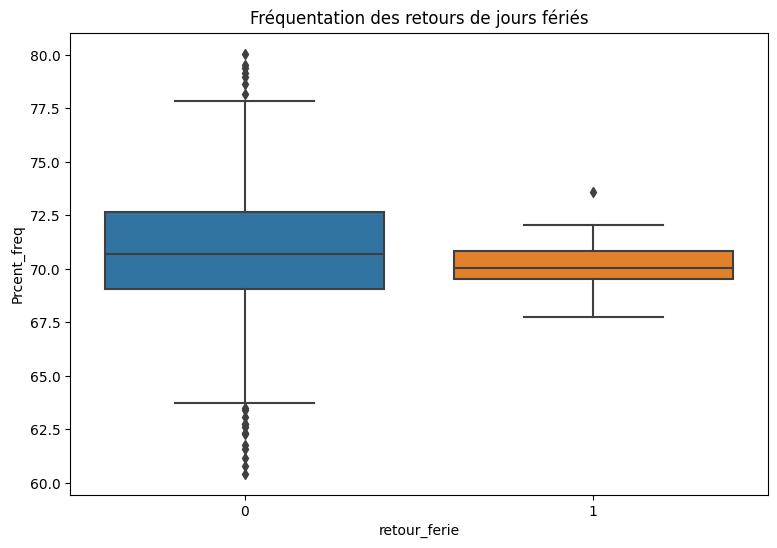

In [62]:
# Fréquence par rapport à 'retour_ferie'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="retour_ferie", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation des retours de jours fériés')
plt.show()

In [63]:
#Anova "veille_ferie"
anova_r_ferie = smf.ols('Prcent_freq~retour_ferie', data=df_freqmenus).fit()
print(anova_r_ferie.summary())
sm.stats.anova_lm(anova_r_ferie, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7868
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.375
Time:                        15:18:15   Log-Likelihood:                -2507.9
No. Observations:                1008   AIC:                             5020.
Df Residuals:                    1006   BIC:                             5030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       70.8259      0.093    763.168   

,sum_sq,df,F,PR(>F)
retour_ferie,6.688269,1.0,0.786779,0.375288
Residual,8551.832121,1006.0,NaN,NaN


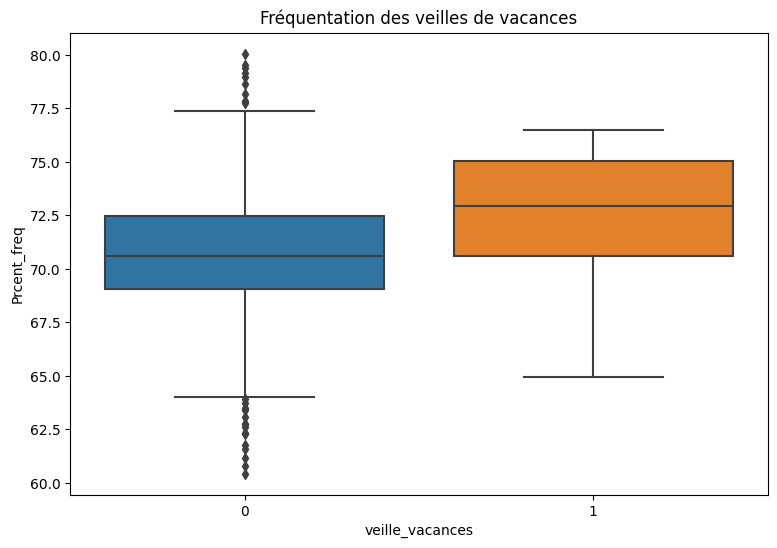

In [64]:
# Fréquence par rapport à 'veille_vacances'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="veille_vacances", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation des veilles de vacances')
plt.show()

In [65]:
#Anova "Veille vacances"
anova_v_vac = smf.ols('Prcent_freq~veille_vacances', data=df_freqmenus).fit()
print(anova_v_vac.summary())
sm.stats.anova_lm(anova_v_vac, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.845
Date:                Wed, 19 Jul 2023   Prob (F-statistic):            0.00301
Time:                        15:18:16   Log-Likelihood:                -2503.9
No. Observations:                1008   AIC:                             5012.
Df Residuals:                    1006   BIC:                             5022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          70.7672      0.093    7

,sum_sq,df,F,PR(>F)
veille_vacances,74.593624,1.0,8.845101,0.003009
Residual,8483.926765,1006.0,NaN,NaN


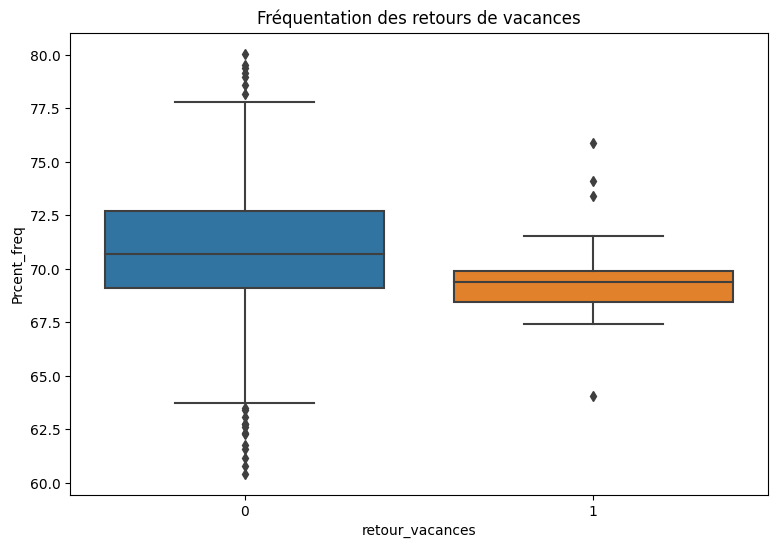

In [66]:
# Fréquence par rapport à 'retour_vacances'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="retour_vacances", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation des retours de vacances')
plt.show()

In [67]:
#Anova "retour_vacances"
anova_r_vac = smf.ols('Prcent_freq~retour_vacances', data=df_freqmenus).fit()
print(anova_r_vac.summary())
sm.stats.anova_lm(anova_r_vac, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.144
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0133
Time:                        15:18:16   Log-Likelihood:                -2505.3
No. Observations:                1008   AIC:                             5015.
Df Residuals:                    1006   BIC:                             5024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          70.8551      0.093    7

,sum_sq,df,F,PR(>F)
retour_vacances,51.952403,1.0,6.143972,0.013349
Residual,8506.567986,1006.0,NaN,NaN


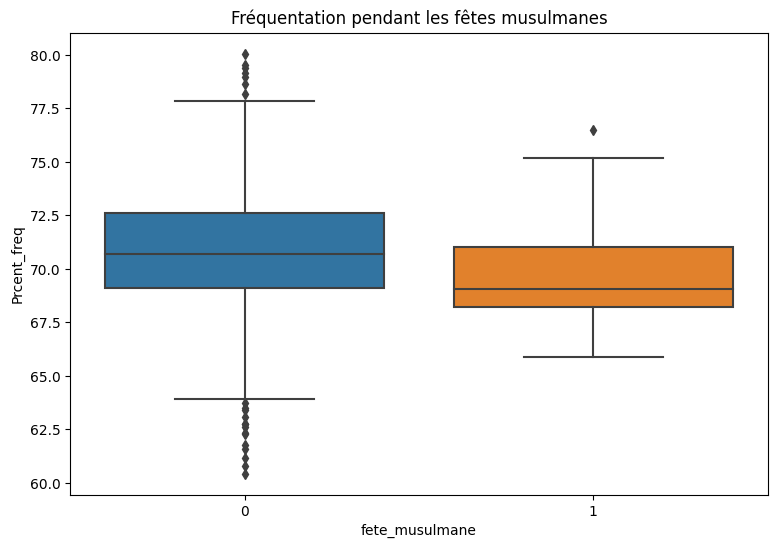

In [68]:
# Fréquence par rapport à 'fete_musulmane'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="fete_musulmane", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation pendant les fêtes musulmanes')
plt.show()

In [69]:
#Anova "fete_musulmane"
anova_f_musul = smf.ols('Prcent_freq~fete_musulmane', data=df_freqmenus).fit()
print(anova_r_vac.summary())
sm.stats.anova_lm(anova_r_vac, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.144
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0133
Time:                        15:18:16   Log-Likelihood:                -2505.3
No. Observations:                1008   AIC:                             5015.
Df Residuals:                    1006   BIC:                             5024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          70.8551      0.093    7

,sum_sq,df,F,PR(>F)
retour_vacances,51.952403,1.0,6.143972,0.013349
Residual,8506.567986,1006.0,NaN,NaN


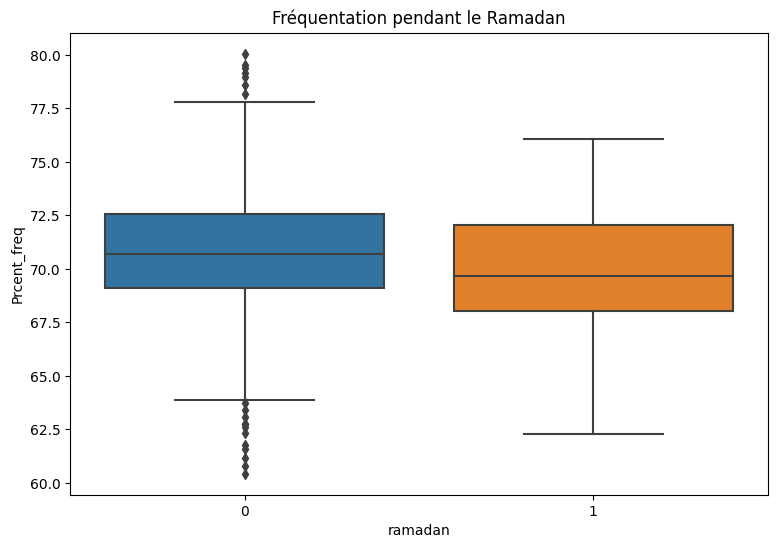

In [70]:
# Fréquence par rapport à 'ramadan'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="ramadan", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation pendant le Ramadan')
plt.show()

In [71]:
# Anova 'ramadan'
anova_ramadan = smf.ols('Prcent_freq~ramadan', data=df_freqmenus).fit()
print(anova_ramadan.summary())
sm.stats.anova_lm(anova_ramadan, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.769
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0292
Time:                        15:18:16   Log-Likelihood:                -2505.9
No. Observations:                1008   AIC:                             5016.
Df Residuals:                    1006   BIC:                             5026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.8630      0.094    750.994      0.0

,sum_sq,df,F,PR(>F)
ramadan,40.382996,1.0,4.76927,0.029202
Residual,8518.137394,1006.0,NaN,NaN


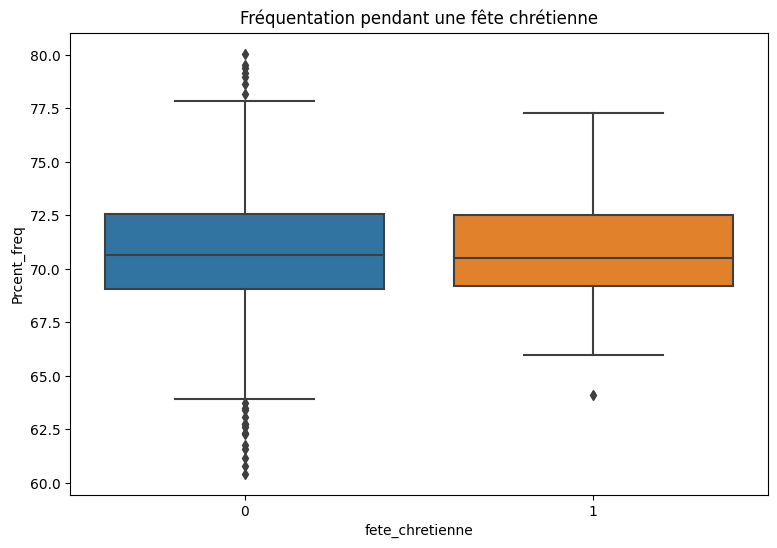

In [72]:
# Fréquence par rapport à 'fete_chretienne'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x="fete_chretienne", y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation pendant une fête chrétienne')
plt.show()

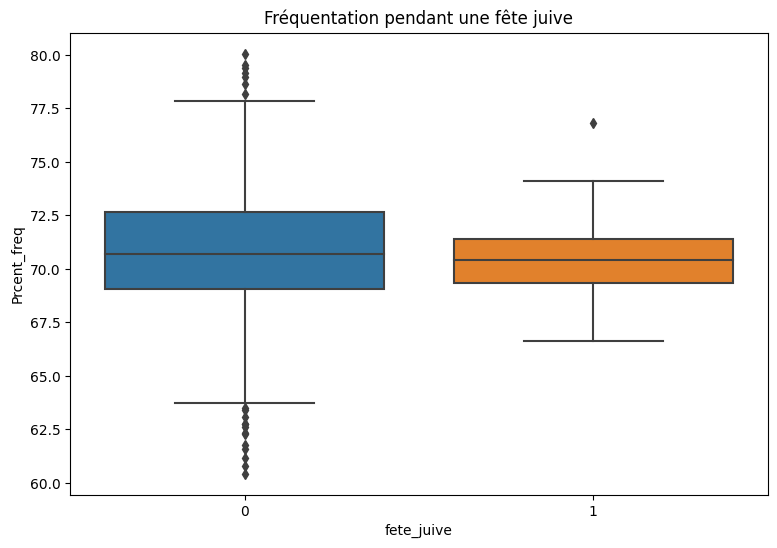

In [73]:
# Fréquence par rapport à 'fete_juive'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='fete_juive', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation pendant une fête juive')
plt.show()

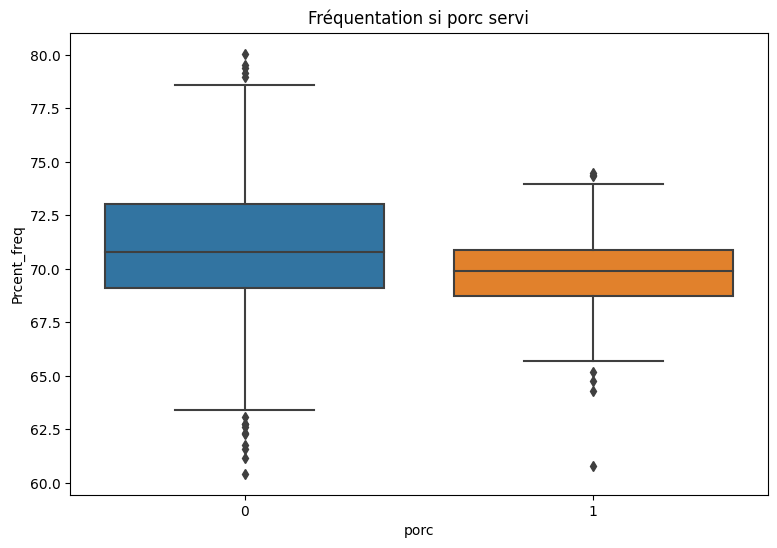

In [74]:
# Fréquence par rapport à 'porc'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='porc', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si porc servi')
plt.show()

In [75]:
# Anova "porc"
anova_porc = smf.ols('Prcent_freq~porc', data=df_freqmenus).fit()
print(anova_porc.summary())
sm.stats.anova_lm(anova_porc, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     22.80
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.06e-06
Time:                        15:18:17   Log-Likelihood:                -2497.0
No. Observations:                1008   AIC:                             4998.
Df Residuals:                    1006   BIC:                             5008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.9861      0.098    726.355      0.0

,sum_sq,df,F,PR(>F)
porc,189.701808,1.0,22.803699,0.000002
Residual,8368.818582,1006.0,NaN,NaN


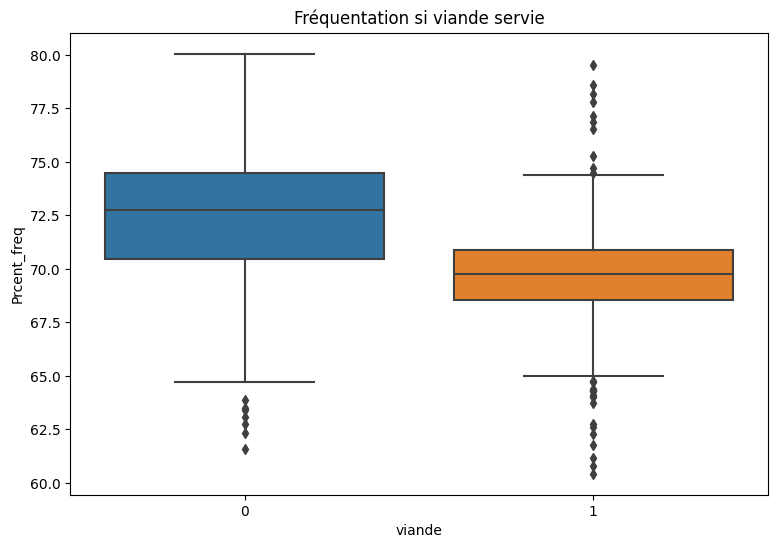

In [76]:
# Fréquence par rapport à 'viande'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='viande', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si viande servie')
plt.show()

In [77]:
# Anova 'viande'
anova_viande = smf.ols('Prcent_freq~viande', data=df_freqmenus).fit()
print(anova_viande.summary())
sm.stats.anova_lm(anova_viande, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.10e-51
Time:                        15:18:17   Log-Likelihood:                -2394.3
No. Observations:                1008   AIC:                             4793.
Df Residuals:                    1006   BIC:                             4802.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.2948      0.124    584.168      0.0

,sum_sq,df,F,PR(>F)
viande,1732.934693,1.0,255.411386,2.096531e-51
Residual,6825.585697,1006.0,NaN,NaN


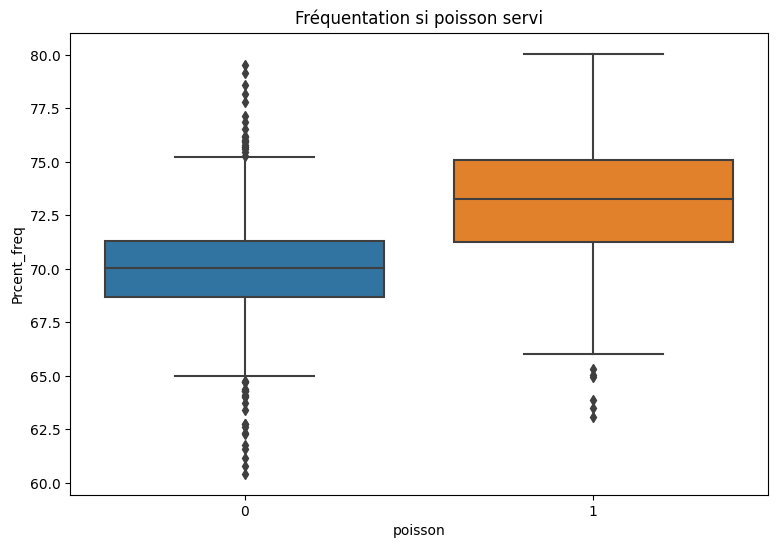

In [78]:
# Fréquence par rapport à 'poisson'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='poisson', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si poisson servi')
plt.show()

In [79]:
#Anova "poisson"
anova_poisson = smf.ols('Prcent_freq~poisson', data=df_freqmenus).fit()
print(anova_poisson.summary())
sm.stats.anova_lm(anova_poisson, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.95e-48
Time:                        15:18:17   Log-Likelihood:                -2401.8
No. Observations:                1008   AIC:                             4808.
Df Residuals:                    1006   BIC:                             4817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0545      0.096    727.641      0.0

,sum_sq,df,F,PR(>F)
poisson,1630.252355,1.0,236.716285,3.948813e-48
Residual,6928.268034,1006.0,NaN,NaN


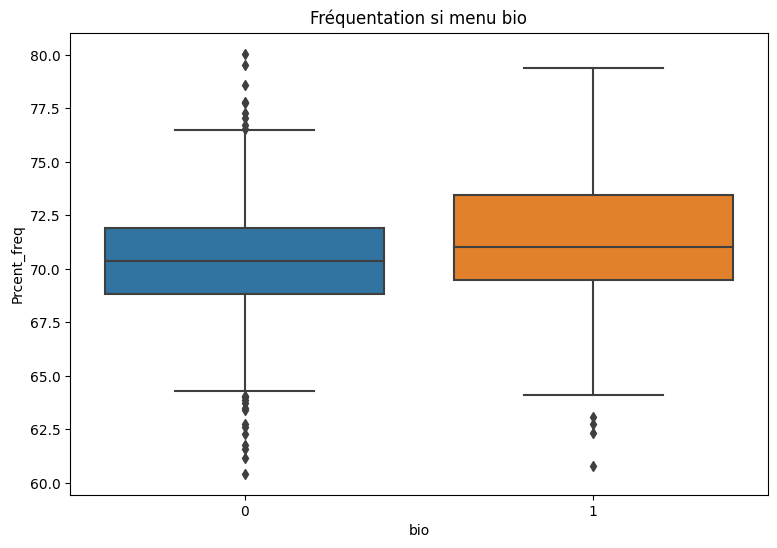

In [80]:
# Fréquence par rapport à 'bio'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='bio', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si menu bio')
plt.show()

In [81]:
#Anova "bio"
anova_bio = smf.ols('Prcent_freq~bio', data=df_freqmenus).fit()
print(anova_bio.summary())
sm.stats.anova_lm(anova_bio, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.62e-06
Time:                        15:18:17   Log-Likelihood:                -2496.8
No. Observations:                1008   AIC:                             4998.
Df Residuals:                    1006   BIC:                             5007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4623      0.116    604.998      0.0

,sum_sq,df,F,PR(>F)
bio,193.563414,1.0,23.278637,0.000002
Residual,8364.956976,1006.0,NaN,NaN


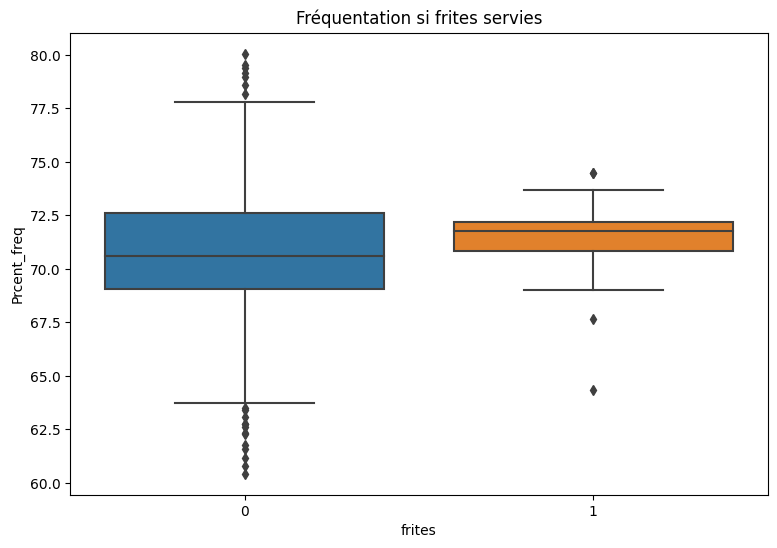

In [82]:
# Fréquence par rapport à 'frites'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='frites', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si frites servies')
plt.show()

In [83]:
#Anova "frites"
anova_frites = smf.ols('Prcent_freq~frites', data=df_freqmenus).fit()
print(anova_frites.summary())
sm.stats.anova_lm(anova_frites, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.277
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.259
Time:                        15:18:18   Log-Likelihood:                -2507.7
No. Observations:                1008   AIC:                             5019.
Df Residuals:                    1006   BIC:                             5029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7952      0.093    758.759      0.0

,sum_sq,df,F,PR(>F)
frites,10.847973,1.0,1.276729,0.258777
Residual,8547.672416,1006.0,NaN,NaN


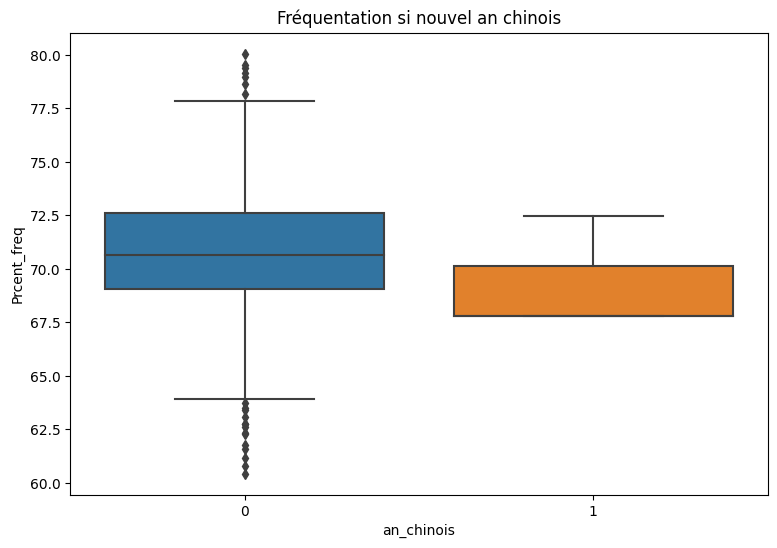

In [84]:
# Fréquence par rapport à 'an_chinois'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='an_chinois', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si nouvel an chinois')
plt.show()

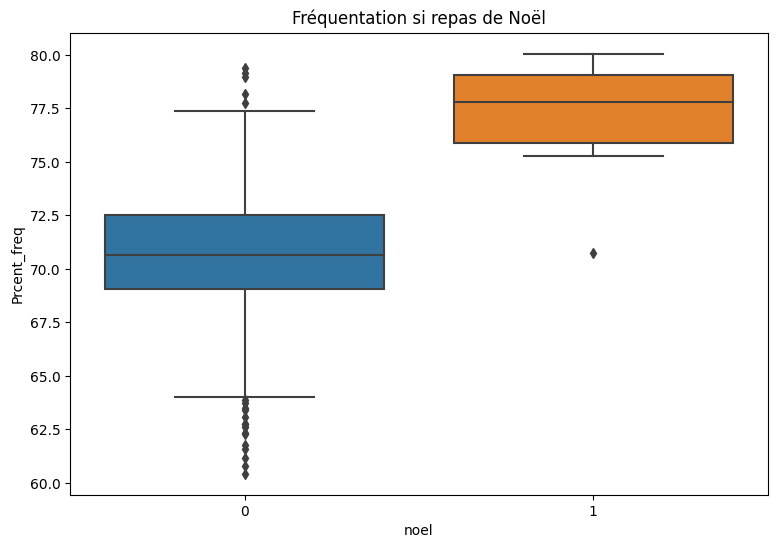

In [85]:
# Fréquence par rapport à 'noel'
fig = plt.figure(1, figsize=(9,6))
ax = sns.boxplot(x='noel', y="Prcent_freq", data=df_freqmenus, showfliers=True)
plt.title('Fréquentation si repas de Noël')
plt.show()

In [86]:
#Anova "noël"
anova_noel = smf.ols('Prcent_freq~noel', data=df_freqmenus).fit()
print(anova_noel.summary())
sm.stats.anova_lm(anova_noel, typ=2)

                            OLS Regression Results                            
Dep. Variable:            Prcent_freq   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     32.00
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.01e-08
Time:                        15:18:18   Log-Likelihood:                -2492.5
No. Observations:                1008   AIC:                             4989.
Df Residuals:                    1006   BIC:                             4999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7712      0.091    779.780      0.0

,sum_sq,df,F,PR(>F)
noel,263.813182,1.0,31.995832,2.013033e-08
Residual,8294.707207,1006.0,NaN,NaN


In [87]:
# Covariance fréquence et grippe
df_freq_grippe = df_freqmenus[['inc_grippe','Prcent_freq']]
df_freq_grippe

,inc_grippe,Prcent_freq
0,10505,64.059172
1,10505,67.967536
2,10505,67.581880
3,10505,70.926150
4,7200,65.054970
...,...,...
1177,822,73.207638
1178,822,77.128354
1179,822,71.858835
1180,822,79.395697


In [88]:
df_freq_grippe = df_freqmenus.groupby('Prcent_freq').agg({'inc_grippe':'mean'}).reset_index()
df_freq_grippe

,Prcent_freq,inc_grippe
0,60.431291,61.0
1,60.779469,0.0
2,61.162996,89.0
3,61.583806,653.0
4,61.750606,116.0
...,...,...
974,78.973041,3881.0
975,79.148633,59.0
976,79.395697,822.0
977,79.523760,1614.0


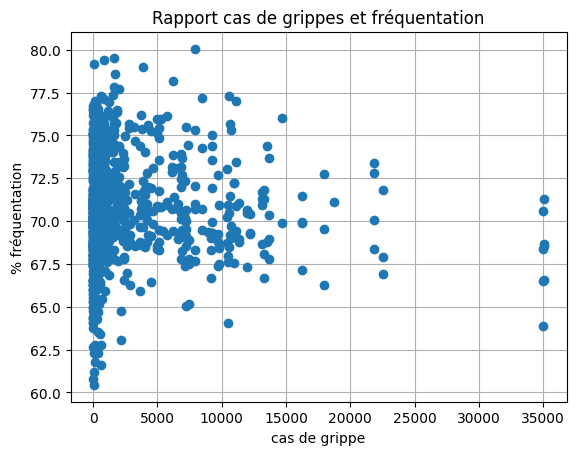

In [89]:
# nuage de points répartition fréquentation/ cas de grippe
plt.plot(df_freq_grippe["inc_grippe"],df_freq_grippe["Prcent_freq"],'o')
plt.xlabel("cas de grippe")
plt.ylabel("% fréquentation")
plt.grid()
plt.title('Rapport cas de grippes et fréquentation')
plt.show()

In [90]:
#corrélation de pearson
df_freq_grippe.corr()

,Prcent_freq,inc_grippe
Prcent_freq,1.000000,-0.058276
inc_grippe,-0.058276,1.000000


In [91]:
#test sperman
from scipy import stats
from scipy.stats import spearmanr

In [92]:
stats.spearmanr(df_freq_grippe['inc_grippe'],df_freq_grippe['Prcent_freq'])

SignificanceResult(statistic=0.08244417011481928, pvalue=0.0098602392588573)

In [93]:
df_freq_grippe.corr( method = "spearman")

,Prcent_freq,inc_grippe
Prcent_freq,1.000000,0.082444
inc_grippe,0.082444,1.000000


In [94]:
# Covariance fréquence et gastro
df_freq_gastro = df_freqmenus[['inc_gastro','Prcent_freq']]
df_freq_gastro

,inc_gastro,Prcent_freq
0,6554,64.059172
1,6554,67.967536
2,6554,67.581880
3,6554,70.926150
4,6453,65.054970
...,...,...
1177,2764,73.207638
1178,2764,77.128354
1179,2764,71.858835
1180,2764,79.395697


In [95]:
df_freq_gastro = df_freqmenus.groupby('Prcent_freq').agg({'inc_gastro':'mean'}).reset_index()
df_freq_gastro

,Prcent_freq,inc_gastro
0,60.431291,1154.0
1,60.779469,2063.0
2,61.162996,1088.0
3,61.583806,356.0
4,61.750606,5858.0
...,...,...
974,78.973041,7405.0
975,79.148633,2509.0
976,79.395697,2764.0
977,79.523760,2798.0


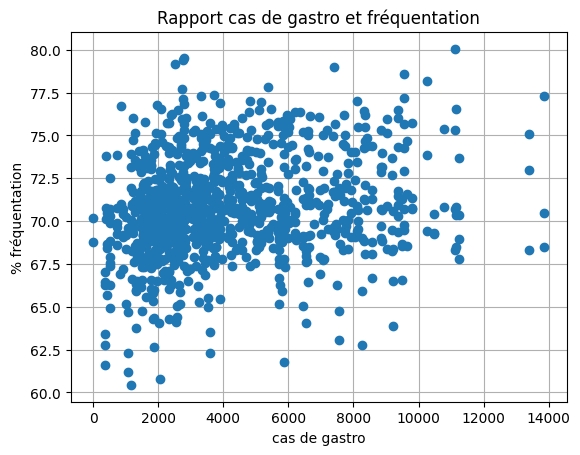

In [96]:
# nuage de points répartition fréquentation/ cas de grippe
plt.plot(df_freq_gastro["inc_gastro"],df_freq_gastro["Prcent_freq"],'o')
plt.xlabel("cas de gastro")
plt.ylabel("% fréquentation")
plt.grid()
plt.title('Rapport cas de gastro et fréquentation')
plt.show()

In [97]:
#corrélation de pearson
df_freq_gastro.corr()

,Prcent_freq,inc_gastro
Prcent_freq,1.000000,0.191368
inc_gastro,0.191368,1.000000


In [98]:
stats.spearmanr(df_freq_gastro['inc_gastro'],df_freq_gastro['Prcent_freq'])

SignificanceResult(statistic=0.19837672988606836, pvalue=3.8152595872207846e-10)

In [99]:
df_freq_gastro.corr( method = "spearman")

,Prcent_freq,inc_gastro
Prcent_freq,1.000000,0.198377
inc_gastro,0.198377,1.000000


In [100]:
# Covariance fréquence et varicelle
df_freq_varic = df_freqmenus[['inc_varicelle','Prcent_freq']]
df_freq_varic

,inc_varicelle,Prcent_freq
0,551,64.059172
1,551,67.967536
2,551,67.581880
3,551,70.926150
4,493,65.054970
...,...,...
1177,103,73.207638
1178,103,77.128354
1179,103,71.858835
1180,103,79.395697


In [101]:
df_freq_varic = df_freqmenus.groupby('Prcent_freq').agg({'inc_varicelle':'mean'}).reset_index()
df_freq_varic

,Prcent_freq,inc_varicelle
0,60.431291,0.0
1,60.779469,340.0
2,61.162996,997.0
3,61.583806,0.0
4,61.750606,441.0
...,...,...
974,78.973041,196.0
975,79.148633,432.0
976,79.395697,103.0
977,79.523760,1398.0


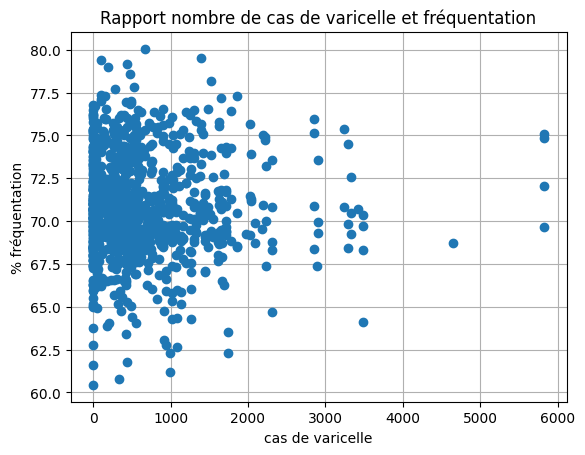

In [102]:
# nuage de points répartition fréquentation/ cas de grippe
plt.plot(df_freq_varic["inc_varicelle"],df_freq_varic["Prcent_freq"],'o')
plt.xlabel("cas de varicelle")
plt.ylabel("% fréquentation")
plt.grid()
plt.title('Rapport nombre de cas de varicelle et fréquentation')
plt.show()

In [103]:
#corrélation de pearson
df_freq_varic.corr()

,Prcent_freq,inc_varicelle
Prcent_freq,1.00000,0.01054
inc_varicelle,0.01054,1.00000


In [104]:
stats.spearmanr(df_freq_varic['inc_varicelle'],df_freq_varic['Prcent_freq'])

SignificanceResult(statistic=-0.00025527275235446954, pvalue=0.9936353272892149)

In [105]:
df_freq_gastro.corr( method = "spearman")

,Prcent_freq,inc_gastro
Prcent_freq,1.000000,0.198377
inc_gastro,0.198377,1.000000


# ANALYSES BIVARIEES

<Axes: xlabel='jour', ylabel='annee_scolaire'>

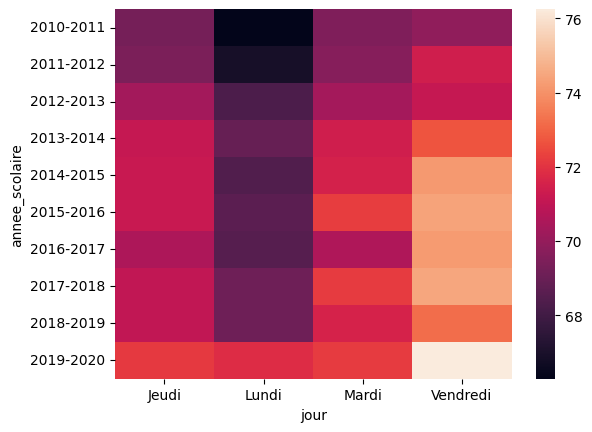

In [106]:
# Fréquentation par année scolaire des jours de la semaine (hors mercredi)
sns.heatmap(df_freqmenus.pivot_table(index = "annee_scolaire", columns="jour" ,values ="Prcent_freq", aggfunc="mean"))

In [107]:
# Fréquentation les jours avec ou sans poisson: Chi2
X = "poisson"
Y = "jour"

cont_1 = df_freqmenus[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

jour,Jeudi,Lundi,Mardi,Vendredi,Total
poisson,,,,,
0,230,239,182,92,743
1,9,15,61,180,265
Total,239,254,243,272,1008


In [108]:
tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_freqmenus)
indep = round(tx.dot(ty) / n)
indep

jour,Jeudi,Lundi,Mardi,Vendredi,Total
poisson,,,,,
0,176.0,187.0,179.0,200.0,743.0
1,63.0,67.0,64.0,72.0,265.0
Total,239.0,254.0,243.0,272.0,1008.0


In [109]:
(cont_1 - indep)/indep

jour,Jeudi,Lundi,Mardi,Vendredi,Total
poisson,,,,,
0,0.306818,0.278075,0.016760,-0.54,0.0
1,-0.857143,-0.776119,-0.046875,1.50,0.0
Total,0.000000,0.000000,0.000000,0.00,0.0


In [110]:
from scipy.stats import chi2_contingency as chi2_contingency
chi2, p, dof, expected_freq= chi2_contingency(cont_1)

In [111]:
chi2, p

(340.5241747420363, 9.527786504574605e-69)

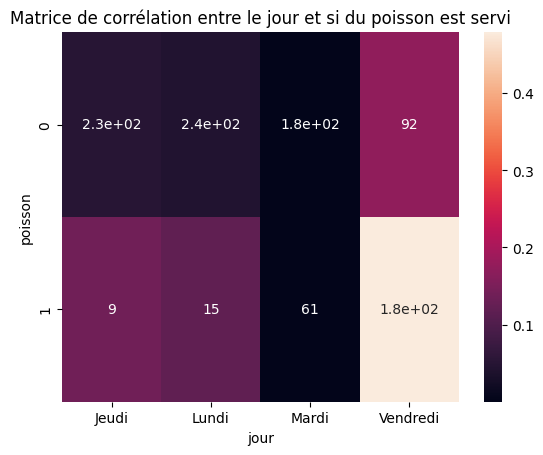

In [112]:
# heatmap jour/poisson avec Chi2
c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le jour et si du poisson est servi')
plt.show()

<Axes: xlabel='poisson', ylabel='jour'>

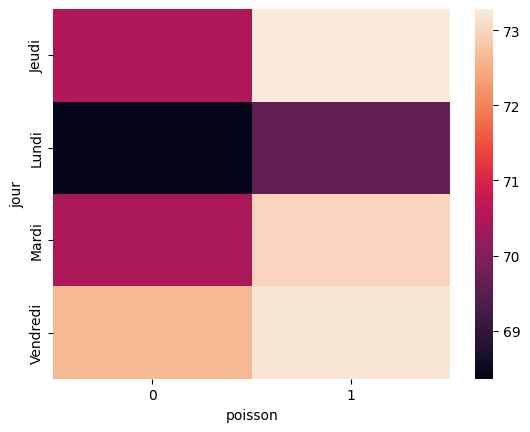

In [113]:
# Heatmap de la fréquentation par jour où du poisson est servi
sns.heatmap(df_freqmenus.pivot_table(index = "jour", columns="poisson" ,values ="Prcent_freq", aggfunc="mean"))

In [114]:
# Fréquentation les jours avec ou sans viande: Chi2

In [115]:
X = "viande"
Y = "jour"

cont_2 = df_freqmenus[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

jour,Jeudi,Lundi,Mardi,Vendredi,Total
viande,,,,,
0,37,46,91,269,443
1,202,208,152,3,565
Total,239,254,243,272,1008


In [116]:
tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(df_freqmenus)
indep_2 = round(tx.dot(ty) / n)
indep_2

jour,Jeudi,Lundi,Mardi,Vendredi,Total
viande,,,,,
0,105.0,112.0,107.0,120.0,443.0
1,134.0,142.0,136.0,152.0,565.0
Total,239.0,254.0,243.0,272.0,1008.0


In [117]:
(cont_2 - indep_2)/indep_2

jour,Jeudi,Lundi,Mardi,Vendredi,Total
viande,,,,,
0,-0.647619,-0.589286,-0.149533,1.241667,0.0
1,0.507463,0.464789,0.117647,-0.980263,0.0
Total,0.000000,0.000000,0.000000,0.000000,0.0


In [118]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)
chi2, p

(340.5241747420363, 9.527786504574605e-69)

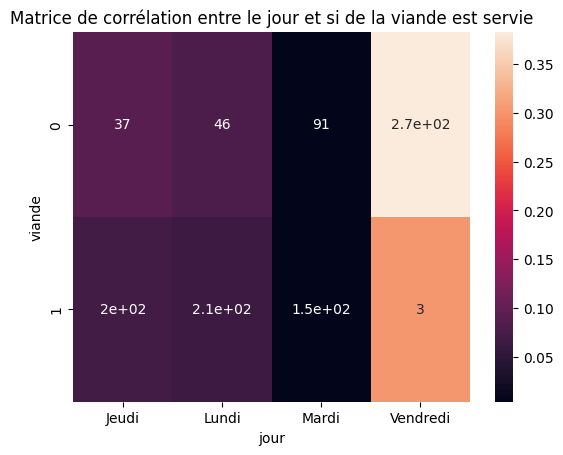

In [119]:
# heatmap jour/viande avec Chi2
c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep_2)**2/indep_2
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le jour et si de la viande est servie')
plt.show()

<Axes: xlabel='viande', ylabel='jour'>

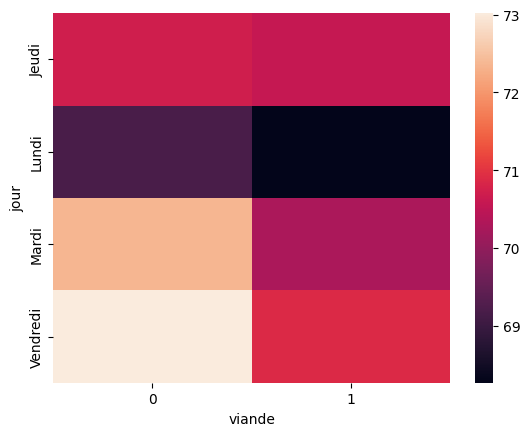

In [120]:
# Heatmap de la fréquentation par jour où de la viande est servie
sns.heatmap(df_freqmenus.pivot_table(index = "jour", columns="viande" ,values ="Prcent_freq", aggfunc="mean"))

In [121]:
# Covariance grippe/semaines de l'année
df_grippe_sem = df_freqmenus[['inc_grippe','semaine']]
df_grippe_sem

,inc_grippe,semaine
0,10505,1
1,10505,1
2,10505,1
3,10505,1
4,7200,2
...,...,...
1177,822,48
1178,822,48
1179,822,48
1180,822,48


In [122]:
df_grippe_sem = df_freqmenus.groupby('semaine').agg({'inc_grippe':'mean'}).reset_index()
df_grippe_sem

,semaine,inc_grippe
0,1,6693.714286
1,2,5436.433333
2,3,6901.612903
3,4,8656.612903
4,5,10603.878788
5,6,11416.038462
6,7,5938.454545
7,8,6341.571429
8,9,10931.500000
9,10,5121.800000


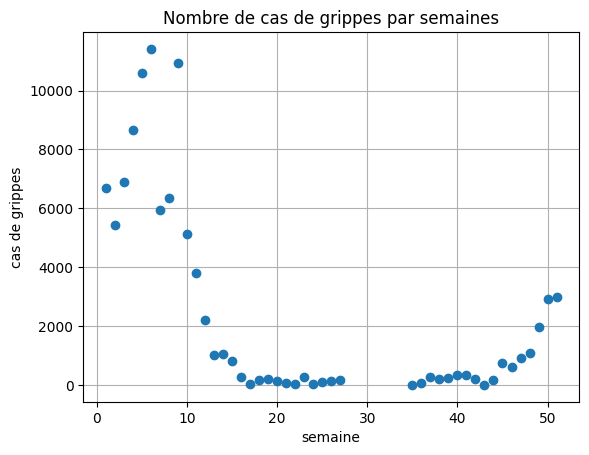

In [123]:
# nuage de points répartition par semaine des cas de grippe
plt.plot(df_grippe_sem["semaine"],df_grippe_sem["inc_grippe"],'o')
plt.xlabel("semaine")
plt.ylabel("cas de grippes")
plt.grid()
plt.title('Nombre de cas de grippes par semaines')
plt.show()

In [124]:
#corrélation de pearson
df_grippe_sem.corr()

,semaine,inc_grippe
semaine,1.000000,-0.599732
inc_grippe,-0.599732,1.000000


In [125]:
stats.spearmanr(df_grippe_sem['semaine'],df_grippe_sem['inc_grippe'])

SignificanceResult(statistic=-0.4568166604900982, pvalue=0.0018264536099803475)

In [126]:
df_grippe_sem.corr( method = "spearman")

,semaine,inc_grippe
semaine,1.000000,-0.456817
inc_grippe,-0.456817,1.000000


In [127]:
# Covariance gastro/semaines de l'année
df_gastro_sem = df_freqmenus[['inc_gastro','semaine']]
df_gastro_sem

,inc_gastro,semaine
0,6554,1
1,6554,1
2,6554,1
3,6554,1
4,6453,2
...,...,...
1177,2764,48
1178,2764,48
1179,2764,48
1180,2764,48


In [128]:
df_gastro_sem = df_freqmenus.groupby('semaine').agg({'inc_gastro':'mean'}).reset_index()
df_gastro_sem

,semaine,inc_gastro
0,1,8031.214286
1,2,6253.666667
2,3,5511.741935
3,4,7159.258065
4,5,6415.393939
5,6,5779.153846
6,7,3436.636364
7,8,4181.142857
8,9,5496.166667
9,10,5163.266667


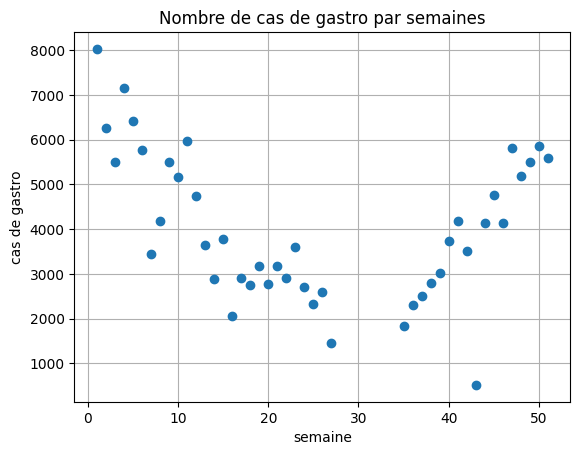

In [129]:
# nuage de points répartition par semaine des cas de gastro
plt.plot(df_gastro_sem["semaine"],df_gastro_sem["inc_gastro"],'o')
plt.xlabel("semaine")
plt.ylabel("cas de gastro")
plt.grid()
plt.title('Nombre de cas de gastro par semaines')
plt.show()

In [130]:
#corrélation de pearson
df_gastro_sem.corr()

,semaine,inc_gastro
semaine,1.000000,-0.253909
inc_gastro,-0.253909,1.000000


In [131]:
stats.spearmanr(df_gastro_sem['semaine'],df_gastro_sem['inc_gastro'])

SignificanceResult(statistic=-0.23735024665257223, pvalue=0.12081999433357102)

In [132]:
df_gastro_sem.corr( method = "spearman")

,semaine,inc_gastro
semaine,1.00000,-0.23735
inc_gastro,-0.23735,1.00000


In [133]:
# Covariance varicelle/semaines de l'année
df_varic_sem = df_freqmenus[['inc_varicelle','semaine']]
df_varic_sem

,inc_varicelle,semaine
0,551,1
1,551,1
2,551,1
3,551,1
4,493,2
...,...,...
1177,103,48
1178,103,48
1179,103,48
1180,103,48


In [134]:
df_varic_sem = df_freqmenus.groupby('semaine').agg({'inc_varicelle':'mean'}).reset_index()
df_varic_sem

,semaine,inc_varicelle
0,1,689.785714
1,2,558.566667
2,3,480.741935
3,4,795.838710
4,5,1122.181818
5,6,460.230769
6,7,767.545455
7,8,888.000000
8,9,841.833333
9,10,956.133333


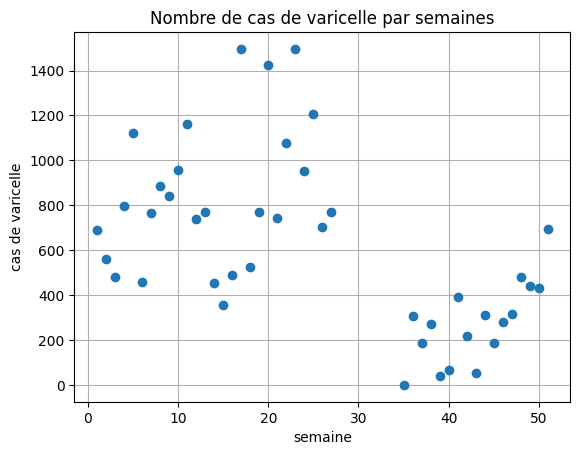

In [135]:
# nuage de points répartition par semaine des cas de varicelle
plt.plot(df_varic_sem["semaine"],df_varic_sem["inc_varicelle"],'o')
plt.xlabel("semaine")
plt.ylabel("cas de varicelle")
plt.grid()
plt.title('Nombre de cas de varicelle par semaines')
plt.show()

In [136]:
#corrélation de pearson
df_varic_sem.corr()

,semaine,inc_varicelle
semaine,1.000000,-0.523671
inc_varicelle,-0.523671,1.000000


In [137]:
stats.spearmanr(df_varic_sem['semaine'],df_varic_sem['inc_varicelle'])

SignificanceResult(statistic=-0.533615221987315, pvalue=0.00019146825928508226)

In [138]:
df_varic_sem.corr( method = "spearman")

,semaine,inc_varicelle
semaine,1.000000,-0.533615
inc_varicelle,-0.533615,1.000000


# ESSAIS MODELES

In [139]:
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [140]:
# méthode get_dummies pour accéder aux valeurs des colonnes 'mois' et 'jours'
df_dummy = pd.get_dummies(df_freqmenus, columns = ['mois', 'jour'], drop_first = ['Avril', 'Jeudi'],dtype='int')
df_dummy.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'semaine', 'greves',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson',
       'bio', 'noel', 'frites', 'an_chinois', '_merge', 'Prcent_freq',
       'mois_Decembre', 'mois_Fevrier', 'mois_Janvier', 'mois_Juillet',
       'mois_Juin', 'mois_Mai', 'mois_Mars', 'mois_Novembre', 'mois_Octobre',
       'mois_Septembre', 'jour_Lundi', 'jour_Mardi', 'jour_Vendredi'],
      dtype='object')

In [141]:
df_dummy.greves.unique()

array([0], dtype=int64)

In [142]:
freq_multi = smf.ols('reel~-1+effectif+poisson+viande+noel+jour_Lundi+jour_Vendredi+mois_Mars+mois_Novembre+mois_Juin+mois_Juillet+mois_Fevrier+mois_Septembre+mois_Decembre', data=df_dummy).fit()
print(freq_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.076e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:18:21   Log-Likelihood:                         -7355.0
No. Observations:                1008   AIC:                                  1.474e+04
Df Residuals:                     995   BIC:                                  1.480e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

# PHASES D'ENTRAINEMENT ET D'OPTIMISATION PAR MODELES

In [143]:
# pour 2011 à 2017: jeu d'entrainement
annees_train = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018']
variables = ['effectif', 'noel', 'poisson', 'viande','bio','jour_Lundi','jour_Vendredi','mois_Novembre',
             'mois_Juin','mois_Juillet','mois_Fevrier','mois_Septembre','mois_Decembre']
# données d'entrainement: variables pertinentes selon l'ANOVA de 2011 à 2017, en incluant effectif
X_train = df_dummy[df_dummy['annee_scolaire'].isin(annees_train)][variables]
# cible d'entrainement: valeurs de 'reel' de 2011 à 2017
y_train = df_dummy[df_dummy['annee_scolaire'].isin(annees_train)]['reel']

In [144]:
# pour 2018-2019: jeu de test
annees_test = ['2018-2019']
"""variables = ['effectif', 'noel', 'poisson', 'viande','bio','jour_Lundi','jour_Vendredi','mois_Novembre',
             'mois_Juin','mois_Juillet','mois_Fevrier','mois_Septembre']"""
X_test = df_dummy[df_dummy['annee_scolaire'].isin(annees_test)][variables]

y_test = df_dummy[df_dummy['annee_scolaire'].isin(annees_test)]['reel']

In [145]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [146]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((871, 13), (871,), (99, 13), (99,))

In [147]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((871, 13), (871,), (99, 13), (99,))

In [148]:
#normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [149]:
"""
=> essais des modèles suivants avec X_train/X_test et X_train_scale/X_test_scale: 
pas de changement notable au niveau des scores"""

'\n=> essais des modèles suivants avec X_train/X_test et X_train_scale/X_test_scale: \npas de changement notable au niveau des scores'

## REGRESSION LINEAIRE

In [150]:
from sklearn import linear_model
regr = linear_model.LinearRegression().fit(X_train,y_train)

In [151]:
# Crossvalidation régression linéaire
from sklearn.model_selection import cross_val_score

In [152]:
# Machine Learnia: propose de faire la moyenne des scores
scores_regr = cross_val_score(linear_model.LinearRegression(), X_train_scale, y_train, scoring='r2', cv=5)
scores_regr_moy = scores_regr.mean()
print(scores_regr)
print(scores_regr_moy)

[0.35125421 0.56600676 0.54063016 0.71870914 0.54694107]
0.5447082695206086


In [153]:
from sklearn.model_selection import GridSearchCV
# Définissez les hyperparamètres à rechercher
# ChatGPT: L'hyperparamètre 'fit_intercept' est un paramètre booléen qui indique si l'intercept doit être ajusté dans le modèle de régression linéaire ou non. 
#L'intercept (également appelé biais ou terme constant) est la valeur de la prédiction lorsque toutes les caractéristiques (features) sont égales à zéro.
param_grid = {
    'fit_intercept': [True, False],  # Cherche avec et sans l'intercept
}

# Effectuez une recherche par grille avec cross-validation
grid_search = GridSearchCV(linear_model.LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Affichez les meilleurs hyperparamètres trouvés et le meilleur score
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)


Meilleurs hyperparamètres :  {'fit_intercept': True}
Meilleur score :  0.5447082695206069


In [154]:
Y_pred = grid_search.predict(X_test)

In [155]:
from sklearn.metrics import r2_score
regr_r2 = r2_score(y_test, Y_pred)
regr_r2

0.45136842986896064

In [156]:
Y_pred

array([14891.62983776, 14548.67206353, 14974.19540947, 14548.67206353,
       14561.43000181, 15135.09211947, 14095.26321258, 14548.67206353,
       14561.43000181, 15122.3341812 , 14095.26321258, 14548.67206353,
       14904.38777603, 14986.95334774, 14273.83664415, 14740.00343338,
       14740.00343338, 15313.66555104, 14616.79441837, 14727.2454951 ,
       15152.76884103, 14273.83664415, 14740.00343338, 15313.66555104,
       14295.77928444, 14761.94607367, 14761.94607367, 15335.60819133,
       15104.90384789, 14749.18813539, 15174.71148133, 14295.77928444,
       14749.18813539, 14749.18813539, 15335.60819133, 14503.35622521,
       14749.18813539, 14761.94607367, 15335.60819133, 14273.59880325,
       14727.0076542 , 15082.7233667 , 15165.28893841, 14273.59880325,
       14739.76559248, 14273.59880325, 15082.7233667 , 15852.51031334,
       15165.28893841, 14286.59458242, 14273.83664415, 14727.2454951 ,
       14740.00343338, 15134.90421407, 15122.14627579, 14107.83324545,
      

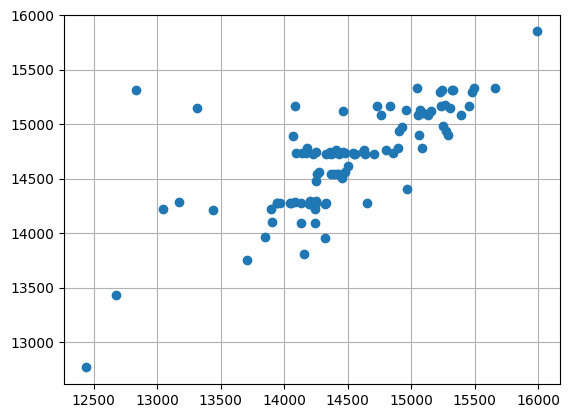

In [157]:
plt.plot(y_test,Y_pred,'o')
plt.grid()
plt.show()

### Optimisation - régression linéaire et comparaison avec les estimations des agents

In [158]:
test = df_dummy[df_dummy['annee_scolaire'].isin(["2018-2019"])]
test

,Unnamed: 0_x,date,annee_scolaire,semaine,greves,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,...,mois_Juillet,mois_Juin,mois_Mai,mois_Mars,mois_Novembre,mois_Octobre,mois_Septembre,jour_Lundi,jour_Mardi,jour_Vendredi
1009,1009,2018-09-04,2018-2019,36,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1010,1010,2018-09-06,2018-2019,36,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1011,1011,2018-09-07,2018-2019,36,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1013,1013,2018-09-11,2018-2019,37,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1014,1014,2018-09-13,2018-2019,37,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,1131,2019-06-24,2018-2019,26,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1132,1132,2019-06-25,2018-2019,26,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1135,1135,2019-07-01,2018-2019,27,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1137,1137,2019-07-04,2018-2019,27,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [159]:
# calcul du gaspillage d'après les prévisions des agents
test["marge_ATR"] = test["prevision"] - test["reel"]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\431648792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["marge_ATR"] = test["prevision"] - test["reel"]


In [160]:
# sur 2018-2019, nombre de repas estimé par les agents
test["marge_ATR"].sum()

86965

In [161]:
# les jours où les prévisions des agents sont en déficit: 1 jour
test[test["marge_ATR"]<0]

,Unnamed: 0_x,date,annee_scolaire,semaine,greves,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,...,mois_Juin,mois_Mai,mois_Mars,mois_Novembre,mois_Octobre,mois_Septembre,jour_Lundi,jour_Mardi,jour_Vendredi,marge_ATR
1022,1022,2018-09-27,2018-2019,39,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-163


In [162]:
test[test["marge_ATR"]>0]["marge_ATR"].sum()

87128

In [163]:
# Ajout d'un coefficient aux prédictions pour une sous-estimation du nombre de repas servi au plus bas
test["pred_regr"] = Y_pred * (1+0.027)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\1999246678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_regr"] = Y_pred * (1+0.027)


"=> ATTENTION : dans notes 'Mars 2019 (beaucoup de fêtes religieuses + jours fériés)'"

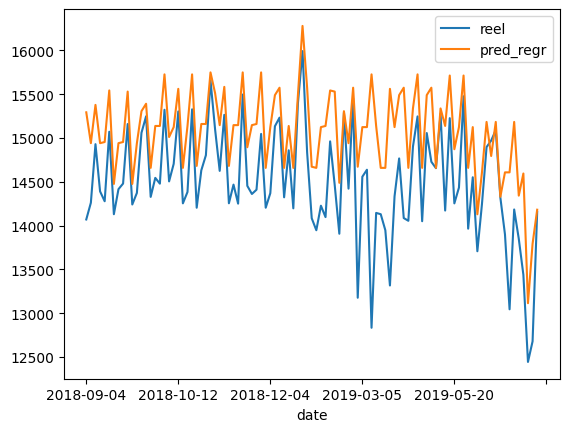

In [164]:
test[["date","reel","pred_regr"]].plot("date",["reel","pred_regr"])
#=> modèle "décroche" autour du mois de mars 2019: 
"""=> ATTENTION : dans notes 'Mars 2019 (beaucoup de fêtes religieuses + jours fériés)'"""

In [165]:
# prévisions d'après le modèle de régression linéaire
test["marge_regr"] =test["pred_regr"] - test["reel"]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\3433223501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["marge_regr"] =test["pred_regr"] - test["reel"]


In [166]:
result_regr = test[test["marge_regr"]>0]["marge_regr"].sum()

In [167]:
# Modèle avec la régression linéaire fait mieux que celui des agents de 33%
(result_regr - 87128)/87128

-0.33265075301146996

In [168]:
# Avec le coefficient 1.027, 1 jour en sous-estimation du nombre de repas
test[test["marge_regr"]<0]

,Unnamed: 0_x,date,annee_scolaire,semaine,greves,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,...,mois_Mars,mois_Novembre,mois_Octobre,mois_Septembre,jour_Lundi,jour_Mardi,jour_Vendredi,marge_ATR,pred_regr,marge_regr
1124,1124,2019-06-11,2018-2019,24,0,0,1,0,0,0,...,0,0,0,0,0,1,0,460,14795.004889,-175.995111


In [169]:
# Ajout d'un coefficient aux prédictions pour minimiser la marge de gaspillage
# seuil du nombre de repas sous-estimé déterminé ici à -200
test["pred_regr2"] = Y_pred * (1+0.022)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\2127039190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_regr2"] = Y_pred * (1+0.022)


In [170]:
test["marge_regr2"] = test["pred_regr2"] - test["reel"]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\574327509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["marge_regr2"] = test["pred_regr2"] - test["reel"]


In [171]:
result_regr2 = test[test["marge_regr2"]>0]["marge_regr2"].sum()

In [172]:
(result_regr2 - 87128)/87128

-0.41242919828506425

In [173]:
# Avec le coefficient 1.022, 1 jours en sous-estimation du nombre de repas(si seuil à -200)
test[test["marge_regr2"]<-200]

,Unnamed: 0_x,date,annee_scolaire,semaine,greves,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,...,mois_Octobre,mois_Septembre,jour_Lundi,jour_Mardi,jour_Vendredi,marge_ATR,pred_regr,marge_regr,pred_regr2,marge_regr2
1124,1124,2019-06-11,2018-2019,24,0,0,1,0,0,0,...,0,0,0,1,0,460,14795.004889,-175.995111,14722.974681,-248.025319


## ESSAI SGD REGRESSOR

In [174]:
sgd = linear_model.SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [175]:
y_pred_sgd = sgd.predict(X_test)

In [176]:
sgd_r2 = r2_score(y_test, y_pred_sgd)
sgd_r2
# pas de crossvalidation vu le r2 score pour le modèle SGD Regressor

-7.514022354946124e+28

## ESSAI LASSO

In [177]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [178]:
y_pred_lasso = lasso.predict(X_test)

In [179]:
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_r2

0.450937121994337

In [180]:
scores_lasso = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
scores_lasso_moy = scores_lasso.mean()
print(scores_lasso)
print(scores_lasso_moy)

[0.3537739  0.56622599 0.54065672 0.71797185 0.54737224]
0.5452001405400259


In [181]:
# Crossvalidation Lasso
scores = cross_val_score(lasso, X_train, y_train, cv=5)
scores

array([0.3537739 , 0.56622599, 0.54065672, 0.71797185, 0.54737224])

In [182]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # Paramètre de régularisation
    'fit_intercept': [True, False],  # Cherche avec et sans l'intercept
}
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Affichez les meilleurs hyperparamètres trouvés et le meilleur score
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

Meilleurs hyperparamètres :  {'alpha': 1.0, 'fit_intercept': True}
Meilleur score :  0.5472110075362598


In [183]:
best_hyperparams = grid_search.best_params_
best_model = grid_search.best_estimator_

In [184]:
best_model.fit(X_train, y_train)

Lasso()

In [185]:
y_pred_lasso = best_model.predict(X_test)
y_pred_lasso

array([14901.94286987, 14562.15471802, 14979.15097786, 14562.15471802,
       14570.76124657, 15135.15691897, 14111.99427227, 14562.15471802,
       14570.76124657, 15126.55039043, 14111.99427227, 14562.15471802,
       14910.54939841, 14987.75750641, 14278.05433657, 14736.82131087,
       14736.82131087, 15301.21698327, 14617.84248842, 14728.21478232,
       15145.21104216, 14278.05433657, 14736.82131087, 15301.21698327,
       14293.62502491, 14752.3919992 , 14752.3919992 , 15316.78767161,
       15092.18015105, 14743.78547066, 15160.78173049, 14293.62502491,
       14743.78547066, 14743.78547066, 15316.78767161, 14494.62029273,
       14743.78547066, 14752.3919992 , 15316.78767161, 14282.43066132,
       14732.59110707, 15080.98578746, 15158.19389545, 14282.43066132,
       14741.19763561, 14282.43066132, 15080.98578746, 15708.84250594,
       15158.19389545, 14286.66086512, 14278.05433657, 14728.21478232,
       14736.82131087, 15139.043301  , 15130.43677245, 14124.48718284,
      

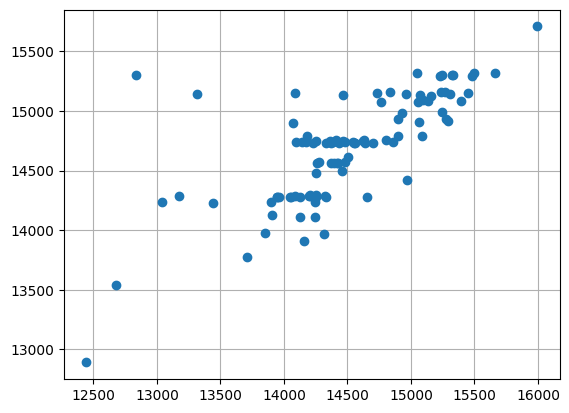

In [186]:
plt.plot(y_test,y_pred_lasso,'o')
plt.grid()
plt.show()

### Optimisation - Lasso et Comparaison avec les estimations des agents

In [187]:
test.columns

Index(['Unnamed: 0_x', 'date', 'annee_scolaire', 'semaine', 'greves',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'Unnamed: 0_y', 'menu', 'porc', 'viande', 'poisson',
       'bio', 'noel', 'frites', 'an_chinois', '_merge', 'Prcent_freq',
       'mois_Decembre', 'mois_Fevrier', 'mois_Janvier', 'mois_Juillet',
       'mois_Juin', 'mois_Mai', 'mois_Mars', 'mois_Novembre', 'mois_Octobre',
       'mois_Septembre', 'jour_Lundi', 'jour_Mardi', 'jour_Vendredi',
       'marge_ATR', 'pred_regr', 'marge_regr', 'pred_regr2', 'marge_regr2'],
      dtype='object')

In [188]:
# ajout d'un coefficient 
test["pred_lasso"] = y_pred_lasso * (1+0.027)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\634395250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_lasso"] = y_pred_lasso * (1+0.027)


<Axes: xlabel='date'>

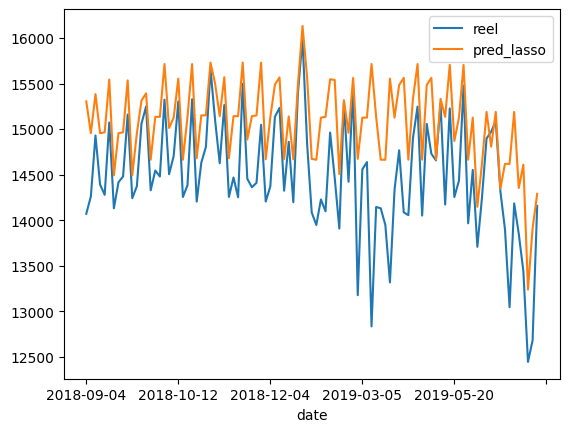

In [189]:
test[["date","reel","pred_lasso"]].plot("date",["reel","pred_lasso"])

In [190]:
# marge d'après le modèle du lasso
test["marge_Lasso"] = test["pred_lasso"] - test["reel"]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\2131102390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["marge_Lasso"] = test["pred_lasso"] - test["reel"]


In [191]:
result_lasso = test[test["marge_Lasso"]>0]["marge_Lasso"].sum()

In [192]:
# Modèle avec le lasso fait mieux que celui des agents de 33% env.
(result_lasso - 87128)/87128

-0.3298874728726079

In [193]:
# Avec le coefficient, 1 jour en sous-estimation du nombre de repas
test[test["marge_Lasso"]<0]

,Unnamed: 0_x,date,annee_scolaire,semaine,greves,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,...,jour_Lundi,jour_Mardi,jour_Vendredi,marge_ATR,pred_regr,marge_regr,pred_regr2,marge_regr2,pred_lasso,marge_Lasso
1124,1124,2019-06-11,2018-2019,24,0,0,1,0,0,0,...,0,1,0,460,14795.004889,-175.995111,14722.974681,-248.025319,14806.731695,-164.268305


## ESSAI DECISION TREE REGRESSOR

In [194]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [195]:
dtr_predicted = dtr.predict(X_test)
dtr_predicted

array([14849.        , 14075.        , 14670.        , 14075.        ,
       13411.        , 14917.33333333, 13648.5       , 14075.        ,
       13411.        , 14917.33333333, 13648.5       , 14075.        ,
       14890.5       , 14822.        , 13853.2       , 14159.57142857,
       14159.57142857, 15174.6       , 13723.        , 14273.8       ,
       14670.        , 13853.2       , 14159.57142857, 15174.6       ,
       13907.5       , 14326.33333333, 14326.33333333, 14899.        ,
       15063.        , 14155.        , 14670.        , 13907.5       ,
       14155.        , 14155.        , 14899.        , 13881.        ,
       14155.        , 14326.33333333, 14899.        , 13812.        ,
       14420.        , 14596.        , 14750.        , 13812.        ,
       14178.        , 13812.        , 14596.        , 14420.        ,
       14750.        , 13870.44444444, 13853.2       , 14273.8       ,
       14159.57142857, 15410.        , 15410.        , 13870.44444444,
      

In [196]:
dtr_r2 = r2_score(y_test, dtr_predicted)
dtr_r2 # Pas d'essai Crossvalidation: dtr_r2 faible

0.20787586543505965

## ESSAI KNN

In [197]:
from sklearn.neighbors import KNeighborsRegressor

In [198]:
knn = KNeighborsRegressor(n_neighbors=7) #hyperparamètre
knn.fit(X_train, y_train)

# On récupère les prédictions sur les données test
predicted_2 = knn.predict(X_test)

In [199]:
knn_r2 = r2_score(np.array(y_test), predicted_2)
knn_r2 # très faible encore

0.24013866526676375

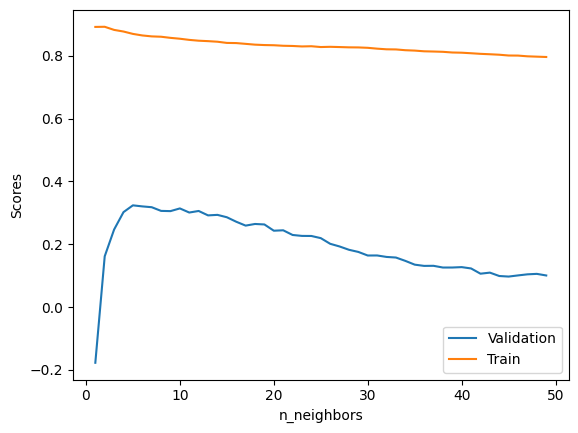

In [200]:
# Machine Learnia: proposition d'une "validation_curve" pour les hyperparamètres
""" Scikit learn: "In this plot you can see the training scores and validation scores of an SVM for different values of the kernel 
parameter gamma. For very low values of gamma, you can see that both the training score and the validation score 
are low. This is called underfitting. Medium values of gamma will result in high values for both scores, i.e. 
the classifier is performing fairly well. If gamma is too high, 
the classifier will overfit, which means that the training score is good but the validation score is poor."""

from sklearn.model_selection import validation_curve
model_knn = KNeighborsRegressor()
k = np.arange(1, 50)

train_score, val_score = validation_curve(
    estimator=model_knn,
    X=X_train,
    y=y_train,
    param_name='n_neighbors',
    param_range=k,
    cv=5
)

plt.plot(k, val_score.mean(axis=1), label='Validation')
plt.plot(k, train_score.mean(axis=1), label='Train')
plt.ylabel('Scores')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

## ESSAI RIDGE

In [201]:
from sklearn.linear_model import Ridge
ridg = Ridge(alpha=1.0)
ridg.fit(X_train, y_train)
Ridge()

Ridge()

In [202]:
pred_ridg = ridg.predict(X_test)

In [203]:
ridg_r2 = r2_score(y_test, pred_ridg)
ridg_r2

0.44465932601947744

In [204]:
# Crossvalidation Ridge: scikit learn: "sklearn.linear_model.RidgeCV: Ridge regression with built-in cross-validation"
from sklearn import neighbors, metrics, model_selection
from sklearn.linear_model import RidgeCV

ridgCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)

In [205]:
rCV_predicted = ridgCV.predict(X_test)
rCV_predicted

array([14891.90119721, 14548.88566214, 14973.59078894, 14548.88566214,
       14561.70001878, 15134.67952917, 14095.71732818, 14548.88566214,
       14561.70001878, 15121.86517253, 14095.71732818, 14548.88566214,
       14904.71555385, 14986.40514557, 14273.53743163, 14739.52012223,
       14739.52012223, 15312.49963262, 14616.5529667 , 14726.70576559,
       15151.41089239, 14273.53743163, 14739.52012223, 15312.49963262,
       14295.98040781, 14761.96309841, 14761.96309841, 15334.9426088 ,
       15104.97863348, 14749.14874177, 15173.85386856, 14295.98040781,
       14749.14874177, 14749.14874177, 15334.9426088 , 14503.53591592,
       14749.14874177, 14761.96309841, 15334.9426088 , 14275.62516289,
       14728.79349686, 15084.62338856, 15166.31298029, 14275.62516289,
       14741.6078535 , 14275.62516289, 15084.62338856, 15833.94648774,
       15166.31298029, 14286.35178827, 14273.53743163, 14726.70576559,
       14739.52012223, 15134.56821133, 15121.75385469, 14108.42036697,
      

In [206]:
ridgCV_r2 = r2_score(y_test, rCV_predicted)
ridgCV_r2

0.450899351906235

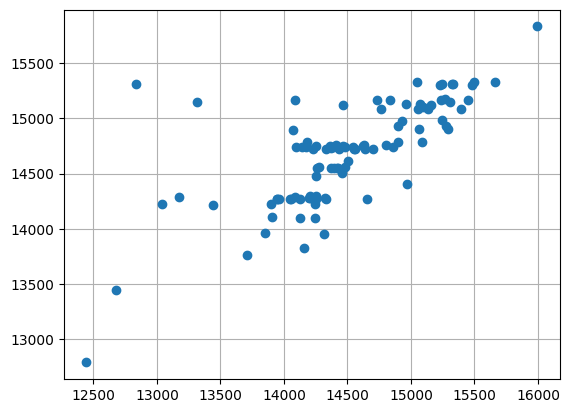

In [207]:
plt.plot(y_test,rCV_predicted,'o')
plt.grid()
plt.show()

### Optimisation - Ridge et Comparaison des prévisions avec celles des agents

In [208]:
# ajout d'un coefficient aux prédictions
test["pred_ridge"] = rCV_predicted * (1+0.028)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\1556190061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pred_ridge"] = rCV_predicted * (1+0.028)


<Axes: xlabel='date'>

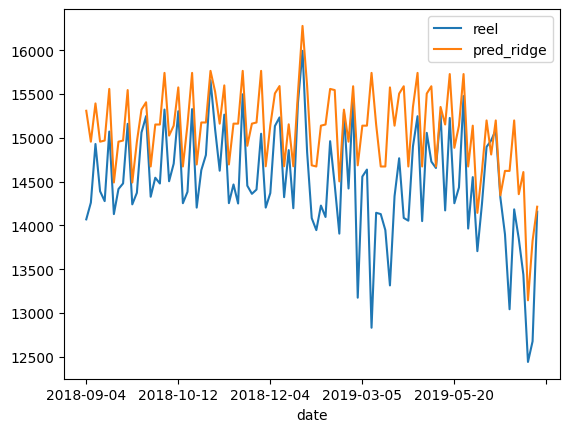

In [209]:
test[["date","reel","pred_ridge"]].plot("date",["reel","pred_ridge"])

In [210]:
# prévisions d'après le modèle Ridge
test["marge_Ridge"] = test["pred_ridge"] - test["reel"]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3604\3836569782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["marge_Ridge"] = test["pred_ridge"] - test["reel"]


In [211]:
result_ridg = test[test["marge_Ridge"]>0]["marge_Ridge"].sum()

In [212]:
# Modèle avec le Ridge fait mieux que celui des agents de 31%
# => avec un coefficient de 1.027 ajouté aux prédictions
(result_ridg - 87128)/87128
#=> si coeff inf: rajoute des jours en sous-estimation

-0.3157707433926247

In [213]:
# Avec le coefficient, 2 jours en sous-estimation du nombre de repas
test[test["marge_Ridge"]<0]

,Unnamed: 0_x,date,annee_scolaire,semaine,greves,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,...,jour_Vendredi,marge_ATR,pred_regr,marge_regr,pred_regr2,marge_regr2,pred_lasso,marge_Lasso,pred_ridge,marge_Ridge
1124,1124,2019-06-11,2018-2019,24,0,0,1,0,0,0,...,0,460,14795.004889,-175.995111,14722.974681,-248.025319,14806.731695,-164.268305,14809.904346,-161.095654


# ESSAI SVM

In [214]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [215]:
y_pred_svm = clf.predict(X_test)
y_pred_svm

array([14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099,
       14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099, 14099],
      dtype=int64)

In [216]:
svm_r2 = r2_score(y_test, y_pred_svm)
svm_r2 #=> R2 score négatif: pas de crossvalidation

-0.3819435225157428

# RECAP DE LA PHASE D'OPTIMISATION DES MODELES
- sur les 7 modèles testés (Régression linéaire, Lasso, Ridge, KNN, SVM, SGD Regressor, Decision Tree Regressor), seuls les 3 premiers ont été retenus (R2 score env. 0.45)
- Pour les 3: un coefficient de 1.027 à 1.028 a été appliqué aux prévisions: optimise le mieux la marge de gaspillage par rapport à celle des agents de Nantes Métropole (-33 % env.), et ne conserve qu'un jour en sous-estimation (nombre de repas en prévision < 0)
- si le seuil du nombre déficitaire de repas est porté à 200: la marge de gaspillage est optimisée jusqu'à -41 % environ, avec un coefficient de 1.022 (sur la régression linéaire), et toujours 1 jour en sous-estimation

Limites:
- Pour les 3 modèles: toujours le 11 juin 2019 en sous-estimation: lendemain du lundi de Pentecôte: 14971 repas servis, prévision des agents à 15431
- "Décrochage" des modèles surtout autour de mars 2019:
dans le tableau de base: 16 jours renseignés pour ce mois dont:
        - 9 jours de grève
        - 1er et 11 mars indiqués comme "fête chrétienne": mais lesquelles? C'est la St Aubin et la Ste Rosine :)
  -> ils sont conservés dans la base de données
  => donc seulement 7 jours pris en compte après nettoyage sur ce mois: suffit à expliquer ce décrochage???

# RECAP PREVISIONS ET MARGES

In [218]:
# Graphique synthétique des prévisions
df_recap_pred = pd.DataFrame(test[['date','reel', 'prevision', 'pred_regr', 'pred_lasso', 'pred_ridge']])
df_recap_pred

,date,reel,prevision,pred_regr,pred_lasso,pred_ridge
1009,2018-09-04,14070,14582,15293.703843,15304.295327,15308.874431
1010,2018-09-06,14261,14553,14941.486209,14955.332895,14956.254461
1011,2018-09-07,14930,15206,15378.498686,15383.588054,15392.851331
1013,2018-09-11,14391,14611,14941.486209,14955.332895,14956.254461
1014,2018-09-13,14278,14820,14954.588612,14964.171800,14969.427619
...,...,...,...,...,...,...
1131,2019-06-24,13850,14910,14342.456402,14353.255822,14357.220457
1132,2019-06-25,13438,15105,14594.925774,14609.148459,14609.710442
1135,2019-07-01,12443,13852,13113.532866,13237.751137,13146.091664
1137,2019-07-04,12678,14422,13792.365275,13906.488055,13825.315773


In [219]:
# Convertir la colonne 'date' en type datetime si elle ne l'est pas déjà
df_recap_pred['date'] = pd.to_datetime(df_recap_pred['date'])
df_recap_pred['date']

1009   2018-09-04
1010   2018-09-06
1011   2018-09-07
1013   2018-09-11
1014   2018-09-13
          ...    
1131   2019-06-24
1132   2019-06-25
1135   2019-07-01
1137   2019-07-04
1138   2019-07-05
Name: date, Length: 99, dtype: datetime64[ns]

In [220]:
# Définir la colonne 'date' comme index pour faciliter le tracé des courbes
df_recap_pred.set_index('date', inplace=True)

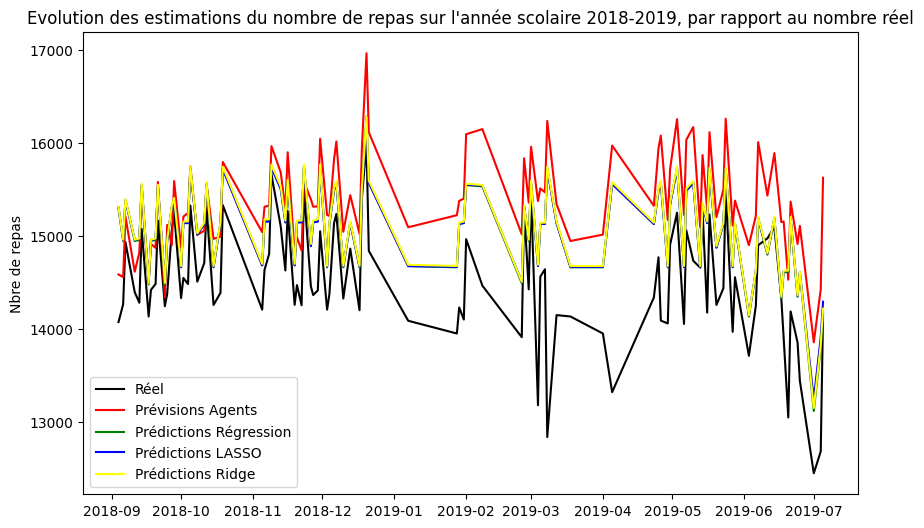

In [221]:
# Créer le graphique avec les courbes pour chaque colonne
plt.figure(figsize=(10, 6))
plt.plot(df_recap_pred.index, df_recap_pred['reel'], color='black', label='Réel')
plt.plot(df_recap_pred.index, df_recap_pred['prevision'], color='red', label='Prévisions Agents')
plt.plot(df_recap_pred.index, df_recap_pred['pred_regr'], color='green', label='Prédictions Régression')
plt.plot(df_recap_pred.index, df_recap_pred['pred_lasso'], color='blue', label='Prédictions LASSO')
plt.plot(df_recap_pred.index, df_recap_pred['pred_ridge'], color='yellow', label='Prédictions Ridge')

# Ajouter des légendes, un titre et des labels d'axe
plt.legend()
plt.title("Evolution des estimations du nombre de repas sur l'année scolaire 2018-2019, par rapport au nombre réel")
plt.ylabel('Nbre de repas')

# Afficher le graphique
plt.show()

In [223]:
# Diagramme en barres : Evolution sur l'année 2018-2019 de la marge de gaspillage des différents modèles 

In [224]:
df_recap_marge = pd.DataFrame(test[['date','marge_ATR', 'marge_regr', 'marge_regr2', 'marge_Lasso', 'marge_Ridge']])
df_recap_marge

,date,marge_ATR,marge_regr,marge_regr2,marge_Lasso,marge_Ridge
1009,2018-09-04,512,1223.703843,1149.245694,1234.295327,1238.874431
1010,2018-09-06,292,680.486209,607.742849,694.332895,695.254461
1011,2018-09-07,276,448.498686,373.627708,453.588054,462.851331
1013,2018-09-11,220,550.486209,477.742849,564.332895,565.254461
1014,2018-09-13,542,676.588612,603.781462,686.171800,691.427619
...,...,...,...,...,...,...
1131,2019-06-24,1060,492.456402,422.629448,503.255822,507.220457
1132,2019-06-25,1667,1156.925774,1085.869660,1171.148459,1171.710442
1135,2019-07-01,1409,670.532866,606.688987,794.751137,703.091664
1137,2019-07-04,1744,1114.365275,1047.216466,1228.488055,1147.315773


In [225]:
# Créez le DataFrame df_marges à partir des colonnes 'date', 'marge_ATR', 'marge_regr', 'marge_regr2', 'marge_Lasso', 'marge_Ridge'
df_marges = pd.DataFrame(test[['date', 'marge_ATR', 'marge_regr', 'marge_regr2', 'marge_Lasso', 'marge_Ridge']])

In [226]:
# Convertir la colonne 'date' en type datetime si elle ne l'est pas déjà
df_marges['date'] = pd.to_datetime(df_marges['date'])

In [227]:
# Définir la colonne 'date' comme index
df_marges.set_index('date', inplace=True)

In [228]:
# Regrouper les données par mois et calculer la moyenne de chaque mois
df_marges_grouped = df_marges.resample('M').mean()

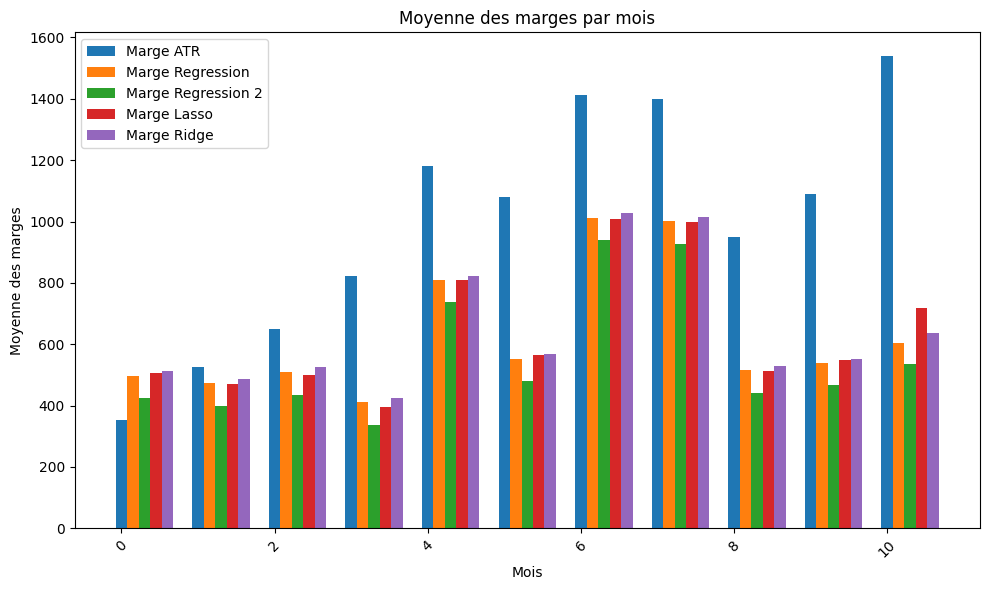

In [229]:
# Créer le diagramme en barre
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = range(len(df_marges_grouped.index))
bar_positions = [index, [i + bar_width for i in index], [i + 2*bar_width for i in index], [i + 3*bar_width for i in index], [i + 4*bar_width for i in index]]
labels = ['Marge ATR', 'Marge Regression', 'Marge Regression 2', 'Marge Lasso', 'Marge Ridge']

for i, col in enumerate(df_marges_grouped.columns):
    plt.bar(bar_positions[i], df_marges_grouped[col], width=bar_width, label=labels[i])


# Ajouter des légendes, un titre et des labels d'axe
plt.legend()
plt.title('Moyenne des marges par mois')
plt.xlabel('Mois')
plt.ylabel('Moyenne des marges')

# Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)
# Afficher le diagramme en barre
plt.tight_layout()
plt.show()